In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from functools import reduce

from functions_file import *
print(testfunction(4))

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_absolute_error, mean_squared_error
import statsmodels.api as sm
import itertools
import collections        
from matplotlib import colors

from NNet import *
from scipy.stats import linregress
import copy
import time
from random import randrange

16


## Model-based Approach

### 1. Load Data

All columns:

    ['polygon','DOW','times','exp_id','lanes','direction',
    'busstops','seplane','complexity','length','road_rank',
    'v_Bus', 'k_Bus', 'q_Bus', # Taxi, Motorcycle, Heavy Vehicle, Medium Vehicle, Car
    'v_Car0050','k_Car0050', 'q_Car0050','stops','lane_changes'] # e.g. 0050 = 5%

In [25]:
min_mean_speed = 15 #km/h
min_duration_of_stops = 5 #seconds
# Select desired data
cols = ['exp_id','times','polygon','DOW','lanes','busstops','seplane','length','road_rank','stop_count','lane_changes']
complexity = 1 # only use links with this level of complexity (exclude link 4)
modes_MS = ['Bus','Taxi','Car0050','Car','all','Motorcycle','Medium Vehicle']
modes_LD = ['all']
scalefactorsfile = '../output/data_processed/scalefactors_bypolygon.pkl'
datafile = '../output/data_processed_events_%skmh_%ssec/processed_data_all_bypolygon.pkl'%(min_mean_speed,min_duration_of_stops)

In [26]:
[cols.extend(['v_%s_MS'%(m),'q_%s_MS'%(m),'k_%s_MS'%(m)]) for m in modes_MS ]
[cols.extend(['v_%s_LD'%(m),'q_%s_LD'%(m),'k_%s_LD'%(m)]) for m in modes_LD ]
all_data = pd.read_pickle(datafile)
data = all_data[(all_data.complexity==complexity)][cols].reset_index(drop=True)

with open(scalefactorsfile, 'rb') as f:
    scalefactors = pickle.load(f)

data = data.reset_index(drop=True)

# Scale values for stops and lane changes
scale_stop_lc = [[0,1],[0,1]]

## Multi-output NN with physical FD contraint (batched)

- CalcV --> calculate estimated derived speed and its error
- Sensor scenarios --> can be found at the end of functions_file.py --> e.g. 'Scen1_qk'; here for the scenarios described in the paper
- Input_sensor_cols --> e.g. ['q_all_LD','k_all_LD']

##################################################################
0 Scen0_qk 0.6
##################################################################


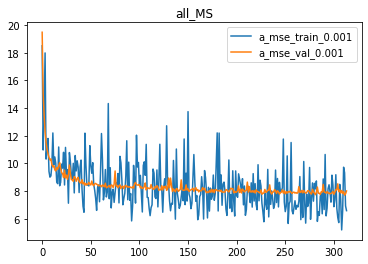

Output
 all_MS
FD factor: 0.6 - Num. outside of FD: 12

Input
['q_all_LD', 'k_all_LD']
Output
['q_all_MS', 'k_all_MS', 'stop_count', 'lane_changes']
##################################################################
0 Scen1_qk 0.6
##################################################################


C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: divide by zero encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: invalid value encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\OneDrive - TUM-VT\Dokumente\TSE_Bottleneck_TRB2022\TRB - Kopie\src\NNet.py:242: RuntimeWarning: invalid value encountered in true_divide
  avg_mape = [np.nanmean((abs((p[t[:,i]>1,i]-t[t[:,i]>1,i])/t[t[:,i]>1,i]))) for i in range(t.shape[1]) ]
C:\Users\ga59com\Anaconda3\envs\trb23wC\lib\site-packages\numpy\lib\function_base.py:2674: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning: divide by zero encountered in true_divide
  vTarget_woinf = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning

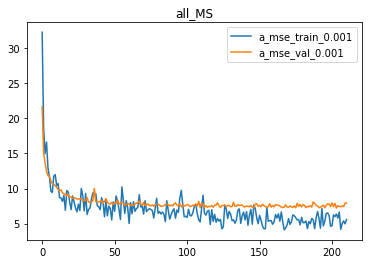

Output
 all_MS
FD factor: 0.6 - Num. outside of FD: 8

Input
['q_Taxi_MS', 'k_Taxi_MS', 'q_all_LD', 'k_all_LD', 'q_Car0050_MS', 'k_Car0050_MS']
Output
['q_all_MS', 'k_all_MS', 'stop_count', 'lane_changes']
##################################################################
0 Scen3_qk 0.6
##################################################################


C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: invalid value encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning: invalid value encountered in true_divide
  vTarget_woinf = t[:,qcols]/t[:,kcols]


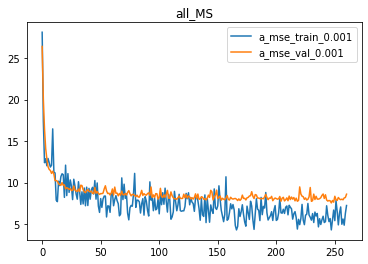

Output
 all_MS
FD factor: 0.6 - Num. outside of FD: 6

Input
['q_Bus_MS', 'k_Bus_MS', 'q_all_LD', 'k_all_LD', 'q_Car0050_MS', 'k_Car0050_MS']
Output
['q_all_MS', 'k_all_MS', 'stop_count', 'lane_changes']
##################################################################
0 Scen10_qk 0.6
##################################################################


C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: divide by zero encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: invalid value encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\OneDrive - TUM-VT\Dokumente\TSE_Bottleneck_TRB2022\TRB - Kopie\src\NNet.py:242: RuntimeWarning: invalid value encountered in true_divide
  avg_mape = [np.nanmean((abs((p[t[:,i]>1,i]-t[t[:,i]>1,i])/t[t[:,i]>1,i]))) for i in range(t.shape[1]) ]
C:\Users\ga59com\Anaconda3\envs\trb23wC\lib\site-packages\numpy\lib\function_base.py:2674: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning: divide by zero encountered in true_divide
  vTarget_woinf = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning

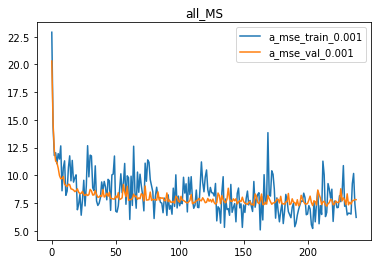

Output
 all_MS
FD factor: 0.6 - Num. outside of FD: 6

Input
['q_Car0050_MS', 'k_Car0050_MS', 'q_all_LD', 'k_all_LD']
Output
['q_all_MS', 'k_all_MS', 'stop_count', 'lane_changes']
##################################################################
0 Scen11_qk 0.6
##################################################################


C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: divide by zero encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: invalid value encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\OneDrive - TUM-VT\Dokumente\TSE_Bottleneck_TRB2022\TRB - Kopie\src\NNet.py:242: RuntimeWarning: invalid value encountered in true_divide
  avg_mape = [np.nanmean((abs((p[t[:,i]>1,i]-t[t[:,i]>1,i])/t[t[:,i]>1,i]))) for i in range(t.shape[1]) ]
C:\Users\ga59com\Anaconda3\envs\trb23wC\lib\site-packages\numpy\lib\function_base.py:2674: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning: divide by zero encountered in true_divide
  vTarget_woinf = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning

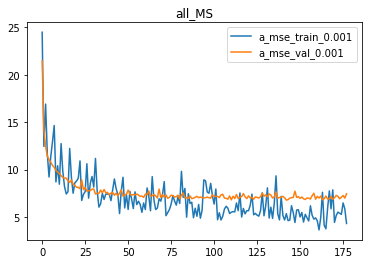

Output
 all_MS
FD factor: 0.6 - Num. outside of FD: 11

Input
['q_Car0050_MS', 'k_Car0050_MS', 'q_all_LD', 'k_all_LD', 'q_Bus_MS', 'k_Bus_MS', 'q_Taxi_MS', 'k_Taxi_MS']
Output
['q_all_MS', 'k_all_MS', 'stop_count', 'lane_changes']
Please set the FD type to 'D', 'T', or 'G'.


C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: invalid value encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning: invalid value encountered in true_divide
  vTarget_woinf = t[:,qcols]/t[:,kcols]


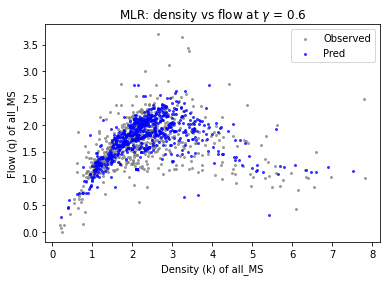

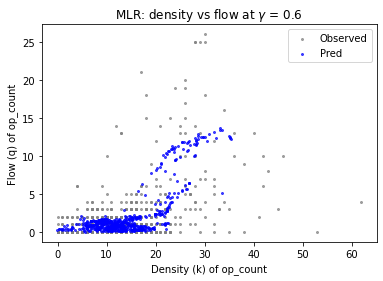

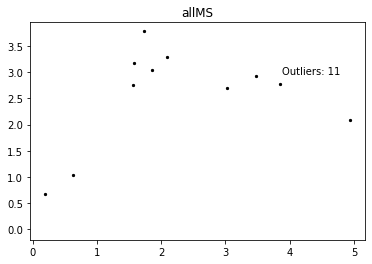

##################################################################
1 Scen0_qk 0.6
##################################################################


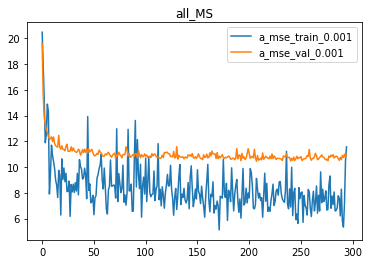

Output
 all_MS
FD factor: 0.6 - Num. outside of FD: 6

Input
['q_all_LD', 'k_all_LD']
Output
['q_all_MS', 'k_all_MS', 'stop_count', 'lane_changes']
##################################################################
1 Scen1_qk 0.6
##################################################################


C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: invalid value encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning: invalid value encountered in true_divide
  vTarget_woinf = t[:,qcols]/t[:,kcols]


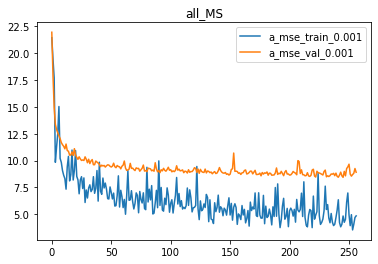

Output
 all_MS
FD factor: 0.6 - Num. outside of FD: 12

Input
['q_Taxi_MS', 'k_Taxi_MS', 'q_all_LD', 'k_all_LD', 'q_Car0050_MS', 'k_Car0050_MS']
Output
['q_all_MS', 'k_all_MS', 'stop_count', 'lane_changes']
##################################################################
1 Scen3_qk 0.6
##################################################################


C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: invalid value encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning: invalid value encountered in true_divide
  vTarget_woinf = t[:,qcols]/t[:,kcols]


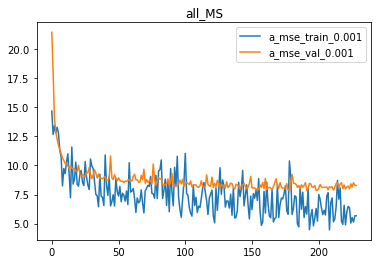

Output
 all_MS
FD factor: 0.6 - Num. outside of FD: 10

Input
['q_Bus_MS', 'k_Bus_MS', 'q_all_LD', 'k_all_LD', 'q_Car0050_MS', 'k_Car0050_MS']
Output
['q_all_MS', 'k_all_MS', 'stop_count', 'lane_changes']
##################################################################
1 Scen10_qk 0.6
##################################################################


C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: divide by zero encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: invalid value encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\OneDrive - TUM-VT\Dokumente\TSE_Bottleneck_TRB2022\TRB - Kopie\src\NNet.py:242: RuntimeWarning: invalid value encountered in true_divide
  avg_mape = [np.nanmean((abs((p[t[:,i]>1,i]-t[t[:,i]>1,i])/t[t[:,i]>1,i]))) for i in range(t.shape[1]) ]
C:\Users\ga59com\Anaconda3\envs\trb23wC\lib\site-packages\numpy\lib\function_base.py:2674: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning: divide by zero encountered in true_divide
  vTarget_woinf = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning

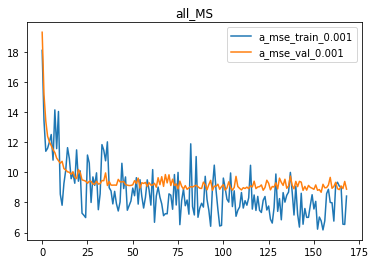

Output
 all_MS
FD factor: 0.6 - Num. outside of FD: 5

Input
['q_Car0050_MS', 'k_Car0050_MS', 'q_all_LD', 'k_all_LD']
Output
['q_all_MS', 'k_all_MS', 'stop_count', 'lane_changes']
##################################################################
1 Scen11_qk 0.6
##################################################################


C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: divide by zero encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: invalid value encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\OneDrive - TUM-VT\Dokumente\TSE_Bottleneck_TRB2022\TRB - Kopie\src\NNet.py:242: RuntimeWarning: invalid value encountered in true_divide
  avg_mape = [np.nanmean((abs((p[t[:,i]>1,i]-t[t[:,i]>1,i])/t[t[:,i]>1,i]))) for i in range(t.shape[1]) ]
C:\Users\ga59com\Anaconda3\envs\trb23wC\lib\site-packages\numpy\lib\function_base.py:2674: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning: divide by zero encountered in true_divide
  vTarget_woinf = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning

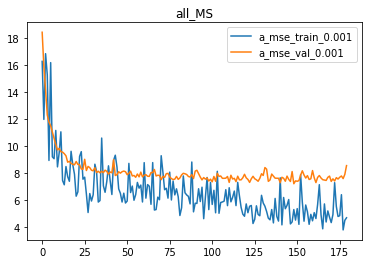

Output
 all_MS
FD factor: 0.6 - Num. outside of FD: 10

Input
['q_Car0050_MS', 'k_Car0050_MS', 'q_all_LD', 'k_all_LD', 'q_Bus_MS', 'k_Bus_MS', 'q_Taxi_MS', 'k_Taxi_MS']
Output
['q_all_MS', 'k_all_MS', 'stop_count', 'lane_changes']
Please set the FD type to 'D', 'T', or 'G'.


C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: divide by zero encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: invalid value encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\OneDrive - TUM-VT\Dokumente\TSE_Bottleneck_TRB2022\TRB - Kopie\src\NNet.py:242: RuntimeWarning: invalid value encountered in true_divide
  avg_mape = [np.nanmean((abs((p[t[:,i]>1,i]-t[t[:,i]>1,i])/t[t[:,i]>1,i]))) for i in range(t.shape[1]) ]
C:\Users\ga59com\Anaconda3\envs\trb23wC\lib\site-packages\numpy\lib\function_base.py:2674: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning: divide by zero encountered in true_divide
  vTarget_woinf = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning

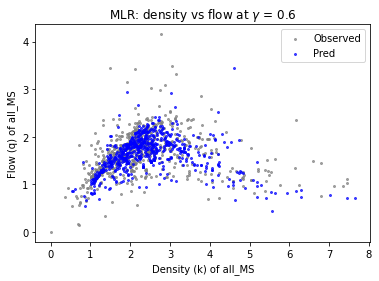

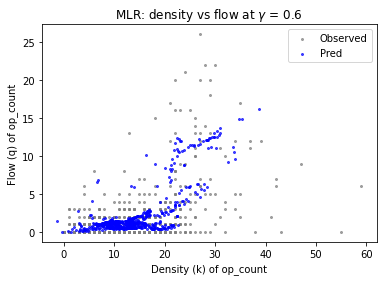

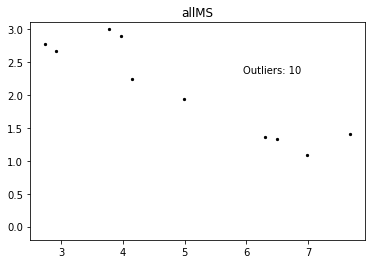

##################################################################
2 Scen0_qk 0.6
##################################################################


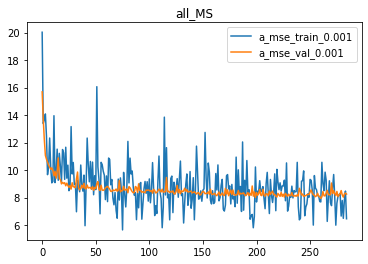

Output
 all_MS
FD factor: 0.6 - Num. outside of FD: 5

Input
['q_all_LD', 'k_all_LD']
Output
['q_all_MS', 'k_all_MS', 'stop_count', 'lane_changes']
##################################################################
2 Scen1_qk 0.6
##################################################################


C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: divide by zero encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: invalid value encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\OneDrive - TUM-VT\Dokumente\TSE_Bottleneck_TRB2022\TRB - Kopie\src\NNet.py:242: RuntimeWarning: invalid value encountered in true_divide
  avg_mape = [np.nanmean((abs((p[t[:,i]>1,i]-t[t[:,i]>1,i])/t[t[:,i]>1,i]))) for i in range(t.shape[1]) ]
C:\Users\ga59com\Anaconda3\envs\trb23wC\lib\site-packages\numpy\lib\function_base.py:2674: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning: divide by zero encountered in true_divide
  vTarget_woinf = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning

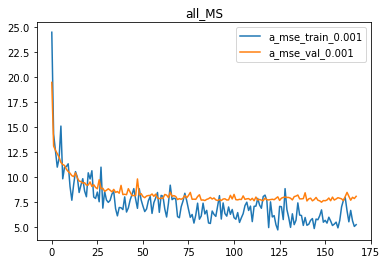

Output
 all_MS
FD factor: 0.6 - Num. outside of FD: 13

Input
['q_Taxi_MS', 'k_Taxi_MS', 'q_all_LD', 'k_all_LD', 'q_Car0050_MS', 'k_Car0050_MS']
Output
['q_all_MS', 'k_all_MS', 'stop_count', 'lane_changes']
##################################################################
2 Scen3_qk 0.6
##################################################################


C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: invalid value encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning: invalid value encountered in true_divide
  vTarget_woinf = t[:,qcols]/t[:,kcols]


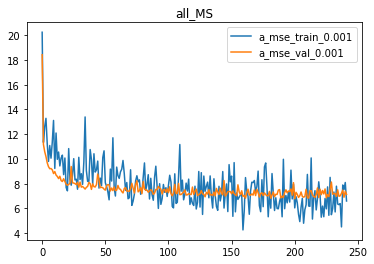

Output
 all_MS
FD factor: 0.6 - Num. outside of FD: 17

Input
['q_Bus_MS', 'k_Bus_MS', 'q_all_LD', 'k_all_LD', 'q_Car0050_MS', 'k_Car0050_MS']
Output
['q_all_MS', 'k_all_MS', 'stop_count', 'lane_changes']
##################################################################
2 Scen10_qk 0.6
##################################################################


C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: invalid value encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning: invalid value encountered in true_divide
  vTarget_woinf = t[:,qcols]/t[:,kcols]


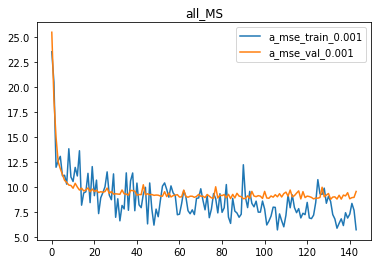

Output
 all_MS
FD factor: 0.6 - Num. outside of FD: 21

Input
['q_Car0050_MS', 'k_Car0050_MS', 'q_all_LD', 'k_all_LD']
Output
['q_all_MS', 'k_all_MS', 'stop_count', 'lane_changes']
##################################################################
2 Scen11_qk 0.6
##################################################################


C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: divide by zero encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: invalid value encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\OneDrive - TUM-VT\Dokumente\TSE_Bottleneck_TRB2022\TRB - Kopie\src\NNet.py:242: RuntimeWarning: invalid value encountered in true_divide
  avg_mape = [np.nanmean((abs((p[t[:,i]>1,i]-t[t[:,i]>1,i])/t[t[:,i]>1,i]))) for i in range(t.shape[1]) ]
C:\Users\ga59com\Anaconda3\envs\trb23wC\lib\site-packages\numpy\lib\function_base.py:2674: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning: divide by zero encountered in true_divide
  vTarget_woinf = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning

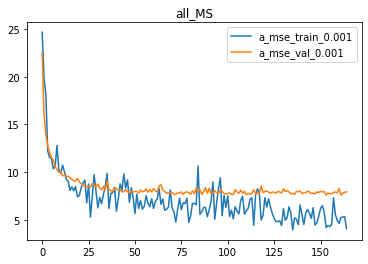

Output
 all_MS
FD factor: 0.6 - Num. outside of FD: 9

Input
['q_Car0050_MS', 'k_Car0050_MS', 'q_all_LD', 'k_all_LD', 'q_Bus_MS', 'k_Bus_MS', 'q_Taxi_MS', 'k_Taxi_MS']
Output
['q_all_MS', 'k_all_MS', 'stop_count', 'lane_changes']
Please set the FD type to 'D', 'T', or 'G'.


C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: invalid value encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning: invalid value encountered in true_divide
  vTarget_woinf = t[:,qcols]/t[:,kcols]


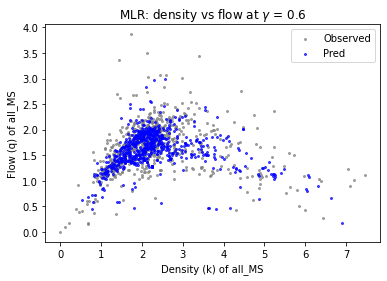

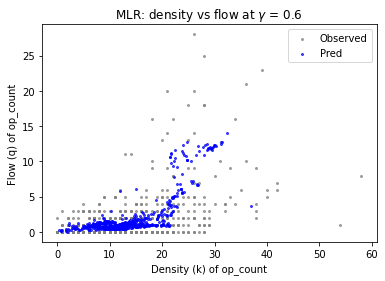

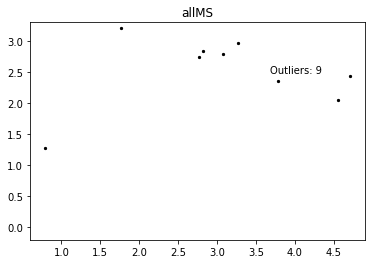

##################################################################
3 Scen0_qk 0.6
##################################################################


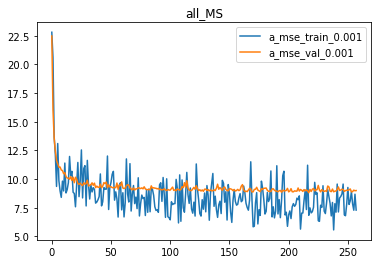

Output
 all_MS
FD factor: 0.6 - Num. outside of FD: 11

Input
['q_all_LD', 'k_all_LD']
Output
['q_all_MS', 'k_all_MS', 'stop_count', 'lane_changes']
##################################################################
3 Scen1_qk 0.6
##################################################################


C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: invalid value encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning: invalid value encountered in true_divide
  vTarget_woinf = t[:,qcols]/t[:,kcols]


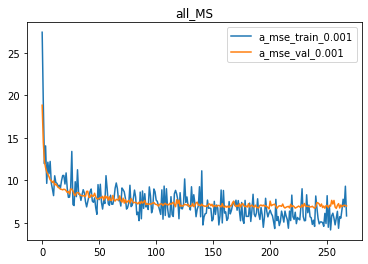

Output
 all_MS
FD factor: 0.6 - Num. outside of FD: 5

Input
['q_Taxi_MS', 'k_Taxi_MS', 'q_all_LD', 'k_all_LD', 'q_Car0050_MS', 'k_Car0050_MS']
Output
['q_all_MS', 'k_all_MS', 'stop_count', 'lane_changes']
##################################################################
3 Scen3_qk 0.6
##################################################################


C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: divide by zero encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: invalid value encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\OneDrive - TUM-VT\Dokumente\TSE_Bottleneck_TRB2022\TRB - Kopie\src\NNet.py:242: RuntimeWarning: invalid value encountered in true_divide
  avg_mape = [np.nanmean((abs((p[t[:,i]>1,i]-t[t[:,i]>1,i])/t[t[:,i]>1,i]))) for i in range(t.shape[1]) ]
C:\Users\ga59com\Anaconda3\envs\trb23wC\lib\site-packages\numpy\lib\function_base.py:2674: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning: divide by zero encountered in true_divide
  vTarget_woinf = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning

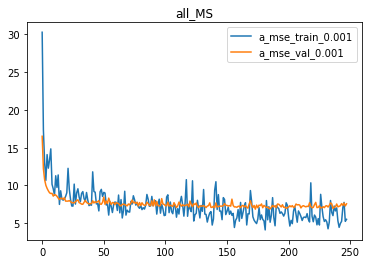

Output
 all_MS
FD factor: 0.6 - Num. outside of FD: 8

Input
['q_Bus_MS', 'k_Bus_MS', 'q_all_LD', 'k_all_LD', 'q_Car0050_MS', 'k_Car0050_MS']
Output
['q_all_MS', 'k_all_MS', 'stop_count', 'lane_changes']
##################################################################
3 Scen10_qk 0.6
##################################################################


C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: invalid value encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning: invalid value encountered in true_divide
  vTarget_woinf = t[:,qcols]/t[:,kcols]


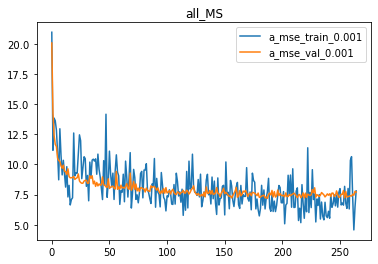

Output
 all_MS
FD factor: 0.6 - Num. outside of FD: 11

Input
['q_Car0050_MS', 'k_Car0050_MS', 'q_all_LD', 'k_all_LD']
Output
['q_all_MS', 'k_all_MS', 'stop_count', 'lane_changes']
##################################################################
3 Scen11_qk 0.6
##################################################################


C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: invalid value encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning: invalid value encountered in true_divide
  vTarget_woinf = t[:,qcols]/t[:,kcols]


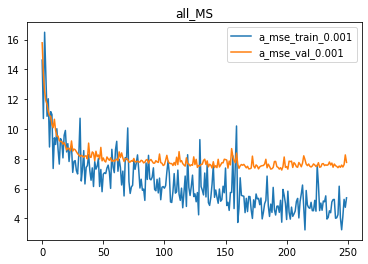

Output
 all_MS
FD factor: 0.6 - Num. outside of FD: 18

Input
['q_Car0050_MS', 'k_Car0050_MS', 'q_all_LD', 'k_all_LD', 'q_Bus_MS', 'k_Bus_MS', 'q_Taxi_MS', 'k_Taxi_MS']
Output
['q_all_MS', 'k_all_MS', 'stop_count', 'lane_changes']
Please set the FD type to 'D', 'T', or 'G'.


C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: invalid value encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning: invalid value encountered in true_divide
  vTarget_woinf = t[:,qcols]/t[:,kcols]


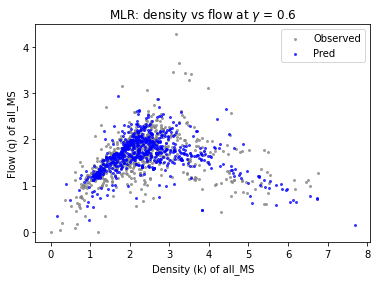

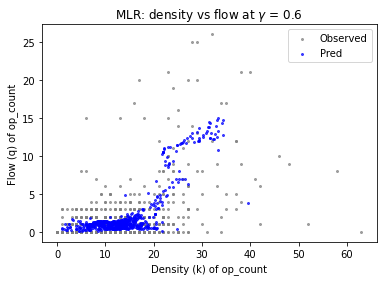

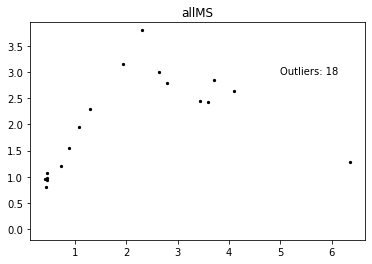

##################################################################
4 Scen0_qk 0.6
##################################################################


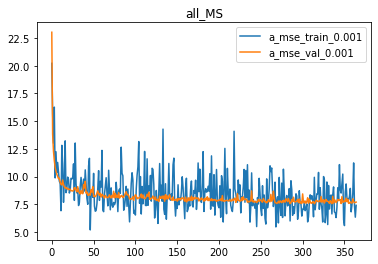

Output
 all_MS
FD factor: 0.6 - Num. outside of FD: 2

Input
['q_all_LD', 'k_all_LD']
Output
['q_all_MS', 'k_all_MS', 'stop_count', 'lane_changes']
##################################################################
4 Scen1_qk 0.6
##################################################################


C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: divide by zero encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: invalid value encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\OneDrive - TUM-VT\Dokumente\TSE_Bottleneck_TRB2022\TRB - Kopie\src\NNet.py:242: RuntimeWarning: invalid value encountered in true_divide
  avg_mape = [np.nanmean((abs((p[t[:,i]>1,i]-t[t[:,i]>1,i])/t[t[:,i]>1,i]))) for i in range(t.shape[1]) ]
C:\Users\ga59com\Anaconda3\envs\trb23wC\lib\site-packages\numpy\lib\function_base.py:2674: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning: divide by zero encountered in true_divide
  vTarget_woinf = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning

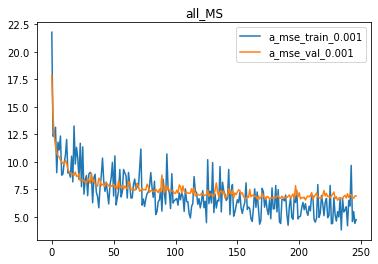

Output
 all_MS
FD factor: 0.6 - Num. outside of FD: 12

Input
['q_Taxi_MS', 'k_Taxi_MS', 'q_all_LD', 'k_all_LD', 'q_Car0050_MS', 'k_Car0050_MS']
Output
['q_all_MS', 'k_all_MS', 'stop_count', 'lane_changes']
##################################################################
4 Scen3_qk 0.6
##################################################################


C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: divide by zero encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: invalid value encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\OneDrive - TUM-VT\Dokumente\TSE_Bottleneck_TRB2022\TRB - Kopie\src\NNet.py:242: RuntimeWarning: invalid value encountered in true_divide
  avg_mape = [np.nanmean((abs((p[t[:,i]>1,i]-t[t[:,i]>1,i])/t[t[:,i]>1,i]))) for i in range(t.shape[1]) ]
C:\Users\ga59com\Anaconda3\envs\trb23wC\lib\site-packages\numpy\lib\function_base.py:2674: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning: divide by zero encountered in true_divide
  vTarget_woinf = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning

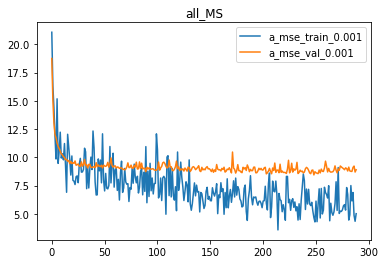

Output
 all_MS
FD factor: 0.6 - Num. outside of FD: 9

Input
['q_Bus_MS', 'k_Bus_MS', 'q_all_LD', 'k_all_LD', 'q_Car0050_MS', 'k_Car0050_MS']
Output
['q_all_MS', 'k_all_MS', 'stop_count', 'lane_changes']
##################################################################
4 Scen10_qk 0.6
##################################################################


C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: divide by zero encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: invalid value encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\OneDrive - TUM-VT\Dokumente\TSE_Bottleneck_TRB2022\TRB - Kopie\src\NNet.py:242: RuntimeWarning: invalid value encountered in true_divide
  avg_mape = [np.nanmean((abs((p[t[:,i]>1,i]-t[t[:,i]>1,i])/t[t[:,i]>1,i]))) for i in range(t.shape[1]) ]
C:\Users\ga59com\Anaconda3\envs\trb23wC\lib\site-packages\numpy\lib\function_base.py:2674: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning: divide by zero encountered in true_divide
  vTarget_woinf = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning

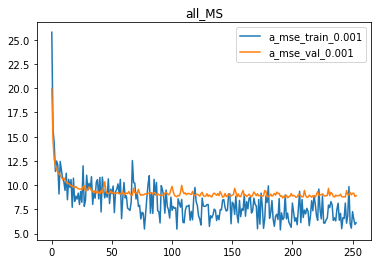

Output
 all_MS
FD factor: 0.6 - Num. outside of FD: 14

Input
['q_Car0050_MS', 'k_Car0050_MS', 'q_all_LD', 'k_all_LD']
Output
['q_all_MS', 'k_all_MS', 'stop_count', 'lane_changes']
##################################################################
4 Scen11_qk 0.6
##################################################################


C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: invalid value encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning: invalid value encountered in true_divide
  vTarget_woinf = t[:,qcols]/t[:,kcols]


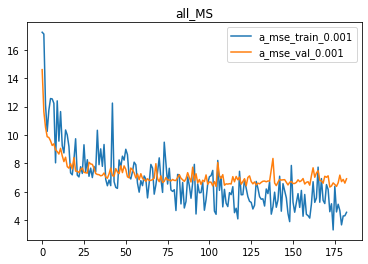

Output
 all_MS
FD factor: 0.6 - Num. outside of FD: 9

Input
['q_Car0050_MS', 'k_Car0050_MS', 'q_all_LD', 'k_all_LD', 'q_Bus_MS', 'k_Bus_MS', 'q_Taxi_MS', 'k_Taxi_MS']
Output
['q_all_MS', 'k_all_MS', 'stop_count', 'lane_changes']
Please set the FD type to 'D', 'T', or 'G'.


C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: invalid value encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning: invalid value encountered in true_divide
  vTarget_woinf = t[:,qcols]/t[:,kcols]


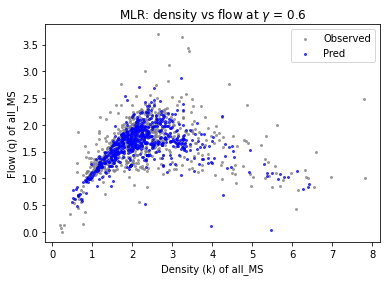

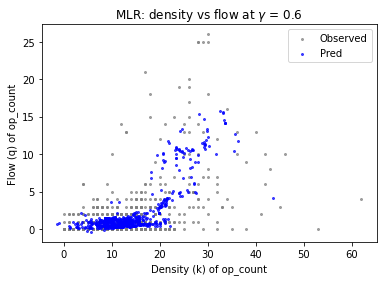

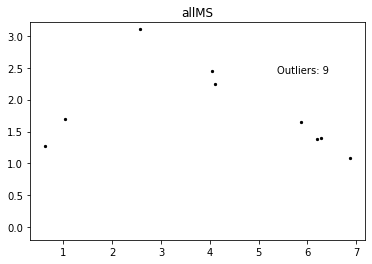

##################################################################
5 Scen0_qk 0.6
##################################################################


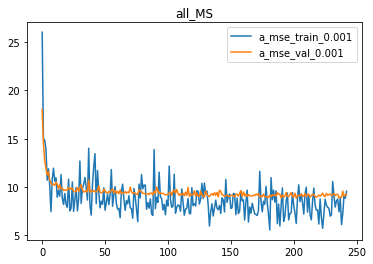

Output
 all_MS
FD factor: 0.6 - Num. outside of FD: 8

Input
['q_all_LD', 'k_all_LD']
Output
['q_all_MS', 'k_all_MS', 'stop_count', 'lane_changes']
##################################################################
5 Scen1_qk 0.6
##################################################################


C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: divide by zero encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: invalid value encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\OneDrive - TUM-VT\Dokumente\TSE_Bottleneck_TRB2022\TRB - Kopie\src\NNet.py:242: RuntimeWarning: invalid value encountered in true_divide
  avg_mape = [np.nanmean((abs((p[t[:,i]>1,i]-t[t[:,i]>1,i])/t[t[:,i]>1,i]))) for i in range(t.shape[1]) ]
C:\Users\ga59com\Anaconda3\envs\trb23wC\lib\site-packages\numpy\lib\function_base.py:2674: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning: divide by zero encountered in true_divide
  vTarget_woinf = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning

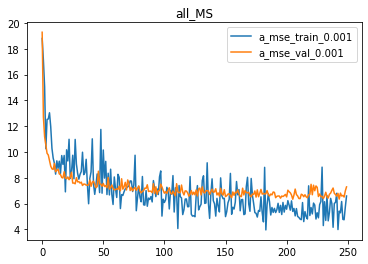

Output
 all_MS
FD factor: 0.6 - Num. outside of FD: 10

Input
['q_Taxi_MS', 'k_Taxi_MS', 'q_all_LD', 'k_all_LD', 'q_Car0050_MS', 'k_Car0050_MS']
Output
['q_all_MS', 'k_all_MS', 'stop_count', 'lane_changes']
##################################################################
5 Scen3_qk 0.6
##################################################################


C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: invalid value encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning: invalid value encountered in true_divide
  vTarget_woinf = t[:,qcols]/t[:,kcols]


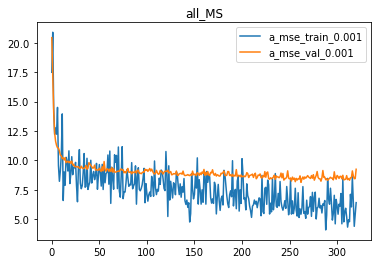

Output
 all_MS
FD factor: 0.6 - Num. outside of FD: 14

Input
['q_Bus_MS', 'k_Bus_MS', 'q_all_LD', 'k_all_LD', 'q_Car0050_MS', 'k_Car0050_MS']
Output
['q_all_MS', 'k_all_MS', 'stop_count', 'lane_changes']
##################################################################
5 Scen10_qk 0.6
##################################################################


C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: invalid value encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning: invalid value encountered in true_divide
  vTarget_woinf = t[:,qcols]/t[:,kcols]


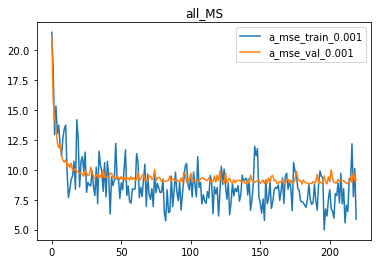

Output
 all_MS
FD factor: 0.6 - Num. outside of FD: 13

Input
['q_Car0050_MS', 'k_Car0050_MS', 'q_all_LD', 'k_all_LD']
Output
['q_all_MS', 'k_all_MS', 'stop_count', 'lane_changes']
##################################################################
5 Scen11_qk 0.6
##################################################################


C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: divide by zero encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: invalid value encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\OneDrive - TUM-VT\Dokumente\TSE_Bottleneck_TRB2022\TRB - Kopie\src\NNet.py:242: RuntimeWarning: invalid value encountered in true_divide
  avg_mape = [np.nanmean((abs((p[t[:,i]>1,i]-t[t[:,i]>1,i])/t[t[:,i]>1,i]))) for i in range(t.shape[1]) ]
C:\Users\ga59com\Anaconda3\envs\trb23wC\lib\site-packages\numpy\lib\function_base.py:2674: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning: divide by zero encountered in true_divide
  vTarget_woinf = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning

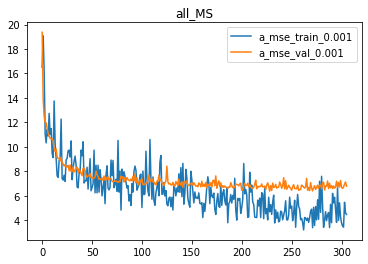

Output
 all_MS
FD factor: 0.6 - Num. outside of FD: 13

Input
['q_Car0050_MS', 'k_Car0050_MS', 'q_all_LD', 'k_all_LD', 'q_Bus_MS', 'k_Bus_MS', 'q_Taxi_MS', 'k_Taxi_MS']
Output
['q_all_MS', 'k_all_MS', 'stop_count', 'lane_changes']
Please set the FD type to 'D', 'T', or 'G'.


C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: invalid value encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning: invalid value encountered in true_divide
  vTarget_woinf = t[:,qcols]/t[:,kcols]


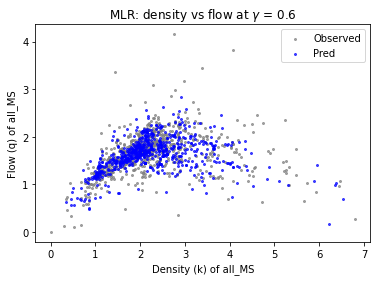

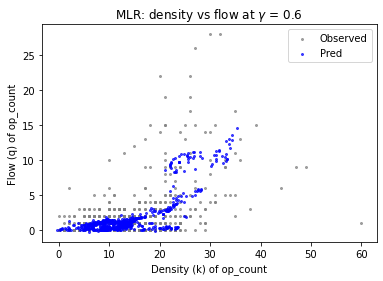

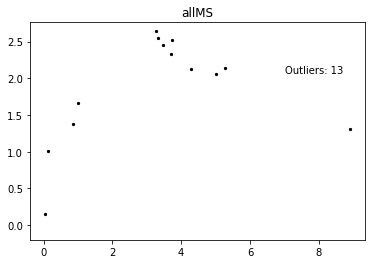

##################################################################
6 Scen0_qk 0.6
##################################################################


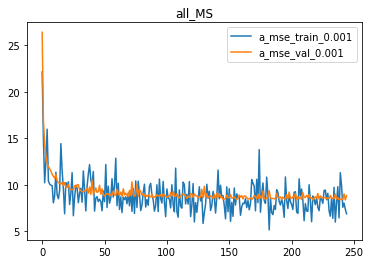

Output
 all_MS
FD factor: 0.6 - Num. outside of FD: 6

Input
['q_all_LD', 'k_all_LD']
Output
['q_all_MS', 'k_all_MS', 'stop_count', 'lane_changes']
##################################################################
6 Scen1_qk 0.6
##################################################################


C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: divide by zero encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: invalid value encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\OneDrive - TUM-VT\Dokumente\TSE_Bottleneck_TRB2022\TRB - Kopie\src\NNet.py:242: RuntimeWarning: invalid value encountered in true_divide
  avg_mape = [np.nanmean((abs((p[t[:,i]>1,i]-t[t[:,i]>1,i])/t[t[:,i]>1,i]))) for i in range(t.shape[1]) ]
C:\Users\ga59com\Anaconda3\envs\trb23wC\lib\site-packages\numpy\lib\function_base.py:2674: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning: divide by zero encountered in true_divide
  vTarget_woinf = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning

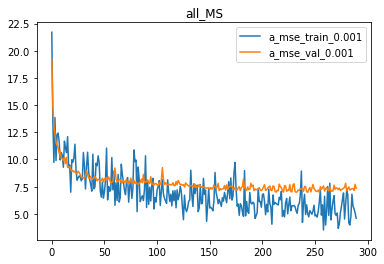

Output
 all_MS
FD factor: 0.6 - Num. outside of FD: 11

Input
['q_Taxi_MS', 'k_Taxi_MS', 'q_all_LD', 'k_all_LD', 'q_Car0050_MS', 'k_Car0050_MS']
Output
['q_all_MS', 'k_all_MS', 'stop_count', 'lane_changes']
##################################################################
6 Scen3_qk 0.6
##################################################################


C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: divide by zero encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: invalid value encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\OneDrive - TUM-VT\Dokumente\TSE_Bottleneck_TRB2022\TRB - Kopie\src\NNet.py:242: RuntimeWarning: invalid value encountered in true_divide
  avg_mape = [np.nanmean((abs((p[t[:,i]>1,i]-t[t[:,i]>1,i])/t[t[:,i]>1,i]))) for i in range(t.shape[1]) ]
C:\Users\ga59com\Anaconda3\envs\trb23wC\lib\site-packages\numpy\lib\function_base.py:2674: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning: divide by zero encountered in true_divide
  vTarget_woinf = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning

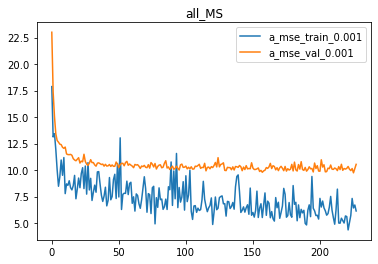

Output
 all_MS
FD factor: 0.6 - Num. outside of FD: 12

Input
['q_Bus_MS', 'k_Bus_MS', 'q_all_LD', 'k_all_LD', 'q_Car0050_MS', 'k_Car0050_MS']
Output
['q_all_MS', 'k_all_MS', 'stop_count', 'lane_changes']
##################################################################
6 Scen10_qk 0.6
##################################################################


C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: invalid value encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning: invalid value encountered in true_divide
  vTarget_woinf = t[:,qcols]/t[:,kcols]


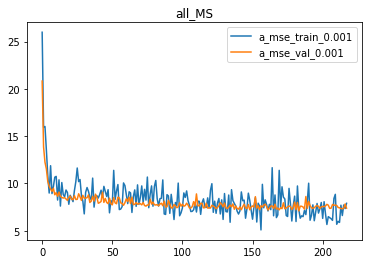

Output
 all_MS
FD factor: 0.6 - Num. outside of FD: 9

Input
['q_Car0050_MS', 'k_Car0050_MS', 'q_all_LD', 'k_all_LD']
Output
['q_all_MS', 'k_all_MS', 'stop_count', 'lane_changes']
##################################################################
6 Scen11_qk 0.6
##################################################################


C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: invalid value encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning: invalid value encountered in true_divide
  vTarget_woinf = t[:,qcols]/t[:,kcols]


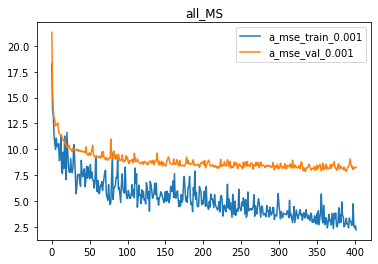

Output
 all_MS
FD factor: 0.6 - Num. outside of FD: 10

Input
['q_Car0050_MS', 'k_Car0050_MS', 'q_all_LD', 'k_all_LD', 'q_Bus_MS', 'k_Bus_MS', 'q_Taxi_MS', 'k_Taxi_MS']
Output
['q_all_MS', 'k_all_MS', 'stop_count', 'lane_changes']
Please set the FD type to 'D', 'T', or 'G'.


C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: invalid value encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning: invalid value encountered in true_divide
  vTarget_woinf = t[:,qcols]/t[:,kcols]


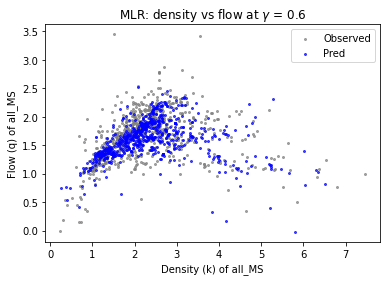

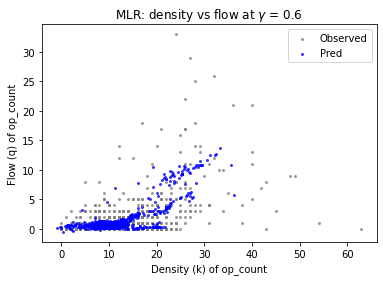

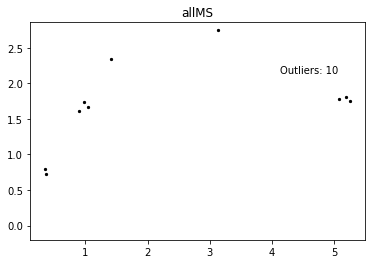

##################################################################
7 Scen0_qk 0.6
##################################################################


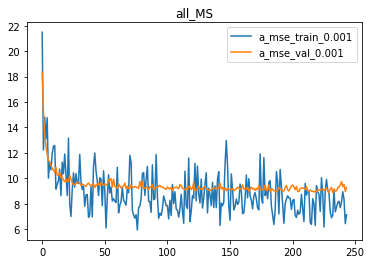

Output
 all_MS
FD factor: 0.6 - Num. outside of FD: 24

Input
['q_all_LD', 'k_all_LD']
Output
['q_all_MS', 'k_all_MS', 'stop_count', 'lane_changes']
##################################################################
7 Scen1_qk 0.6
##################################################################


C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: divide by zero encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: invalid value encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\OneDrive - TUM-VT\Dokumente\TSE_Bottleneck_TRB2022\TRB - Kopie\src\NNet.py:242: RuntimeWarning: invalid value encountered in true_divide
  avg_mape = [np.nanmean((abs((p[t[:,i]>1,i]-t[t[:,i]>1,i])/t[t[:,i]>1,i]))) for i in range(t.shape[1]) ]
C:\Users\ga59com\Anaconda3\envs\trb23wC\lib\site-packages\numpy\lib\function_base.py:2674: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning: divide by zero encountered in true_divide
  vTarget_woinf = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning

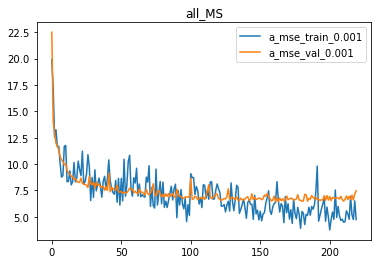

Output
 all_MS
FD factor: 0.6 - Num. outside of FD: 17

Input
['q_Taxi_MS', 'k_Taxi_MS', 'q_all_LD', 'k_all_LD', 'q_Car0050_MS', 'k_Car0050_MS']
Output
['q_all_MS', 'k_all_MS', 'stop_count', 'lane_changes']
##################################################################
7 Scen3_qk 0.6
##################################################################


C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: invalid value encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning: invalid value encountered in true_divide
  vTarget_woinf = t[:,qcols]/t[:,kcols]


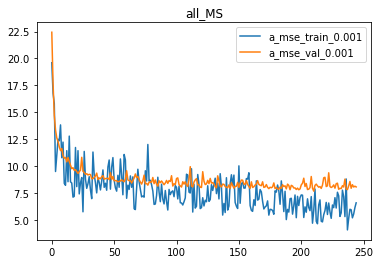

Output
 all_MS
FD factor: 0.6 - Num. outside of FD: 10

Input
['q_Bus_MS', 'k_Bus_MS', 'q_all_LD', 'k_all_LD', 'q_Car0050_MS', 'k_Car0050_MS']
Output
['q_all_MS', 'k_all_MS', 'stop_count', 'lane_changes']
##################################################################
7 Scen10_qk 0.6
##################################################################


C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: divide by zero encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: invalid value encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\OneDrive - TUM-VT\Dokumente\TSE_Bottleneck_TRB2022\TRB - Kopie\src\NNet.py:242: RuntimeWarning: invalid value encountered in true_divide
  avg_mape = [np.nanmean((abs((p[t[:,i]>1,i]-t[t[:,i]>1,i])/t[t[:,i]>1,i]))) for i in range(t.shape[1]) ]
C:\Users\ga59com\Anaconda3\envs\trb23wC\lib\site-packages\numpy\lib\function_base.py:2674: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning: divide by zero encountered in true_divide
  vTarget_woinf = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning

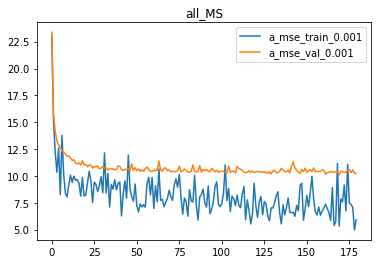

Output
 all_MS
FD factor: 0.6 - Num. outside of FD: 8

Input
['q_Car0050_MS', 'k_Car0050_MS', 'q_all_LD', 'k_all_LD']
Output
['q_all_MS', 'k_all_MS', 'stop_count', 'lane_changes']
##################################################################
7 Scen11_qk 0.6
##################################################################


C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: invalid value encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning: invalid value encountered in true_divide
  vTarget_woinf = t[:,qcols]/t[:,kcols]


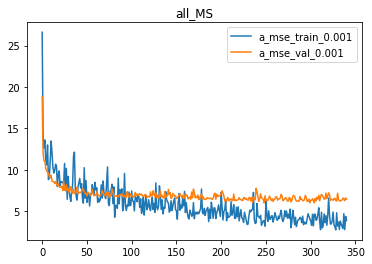

Output
 all_MS
FD factor: 0.6 - Num. outside of FD: 8

Input
['q_Car0050_MS', 'k_Car0050_MS', 'q_all_LD', 'k_all_LD', 'q_Bus_MS', 'k_Bus_MS', 'q_Taxi_MS', 'k_Taxi_MS']
Output
['q_all_MS', 'k_all_MS', 'stop_count', 'lane_changes']
Please set the FD type to 'D', 'T', or 'G'.


C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: invalid value encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning: invalid value encountered in true_divide
  vTarget_woinf = t[:,qcols]/t[:,kcols]


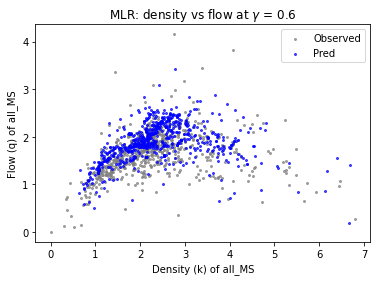

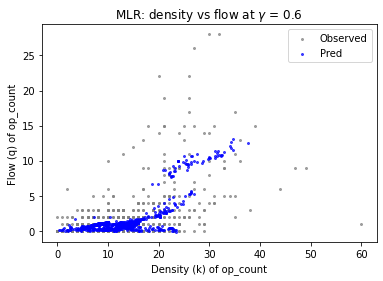

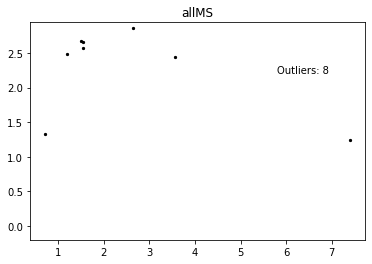

##################################################################
8 Scen0_qk 0.6
##################################################################


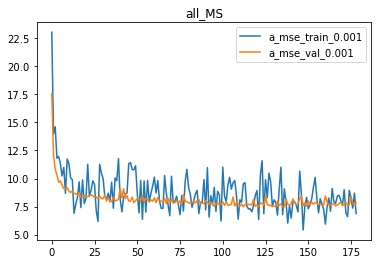

Output
 all_MS
FD factor: 0.6 - Num. outside of FD: 8

Input
['q_all_LD', 'k_all_LD']
Output
['q_all_MS', 'k_all_MS', 'stop_count', 'lane_changes']
##################################################################
8 Scen1_qk 0.6
##################################################################


C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: invalid value encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning: invalid value encountered in true_divide
  vTarget_woinf = t[:,qcols]/t[:,kcols]


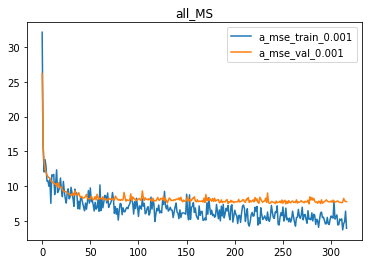

Output
 all_MS
FD factor: 0.6 - Num. outside of FD: 9

Input
['q_Taxi_MS', 'k_Taxi_MS', 'q_all_LD', 'k_all_LD', 'q_Car0050_MS', 'k_Car0050_MS']
Output
['q_all_MS', 'k_all_MS', 'stop_count', 'lane_changes']
##################################################################
8 Scen3_qk 0.6
##################################################################


C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: invalid value encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning: invalid value encountered in true_divide
  vTarget_woinf = t[:,qcols]/t[:,kcols]


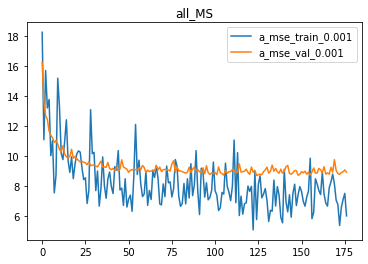

Output
 all_MS
FD factor: 0.6 - Num. outside of FD: 16

Input
['q_Bus_MS', 'k_Bus_MS', 'q_all_LD', 'k_all_LD', 'q_Car0050_MS', 'k_Car0050_MS']
Output
['q_all_MS', 'k_all_MS', 'stop_count', 'lane_changes']
##################################################################
8 Scen10_qk 0.6
##################################################################


C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: invalid value encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning: invalid value encountered in true_divide
  vTarget_woinf = t[:,qcols]/t[:,kcols]


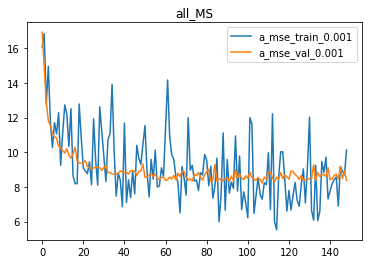

Output
 all_MS
FD factor: 0.6 - Num. outside of FD: 17

Input
['q_Car0050_MS', 'k_Car0050_MS', 'q_all_LD', 'k_all_LD']
Output
['q_all_MS', 'k_all_MS', 'stop_count', 'lane_changes']
##################################################################
8 Scen11_qk 0.6
##################################################################


C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: invalid value encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning: invalid value encountered in true_divide
  vTarget_woinf = t[:,qcols]/t[:,kcols]


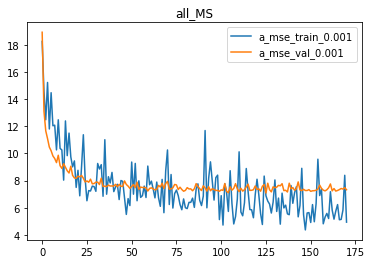

Output
 all_MS
FD factor: 0.6 - Num. outside of FD: 12

Input
['q_Car0050_MS', 'k_Car0050_MS', 'q_all_LD', 'k_all_LD', 'q_Bus_MS', 'k_Bus_MS', 'q_Taxi_MS', 'k_Taxi_MS']
Output
['q_all_MS', 'k_all_MS', 'stop_count', 'lane_changes']
Please set the FD type to 'D', 'T', or 'G'.


C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: divide by zero encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: invalid value encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\OneDrive - TUM-VT\Dokumente\TSE_Bottleneck_TRB2022\TRB - Kopie\src\NNet.py:242: RuntimeWarning: invalid value encountered in true_divide
  avg_mape = [np.nanmean((abs((p[t[:,i]>1,i]-t[t[:,i]>1,i])/t[t[:,i]>1,i]))) for i in range(t.shape[1]) ]
C:\Users\ga59com\Anaconda3\envs\trb23wC\lib\site-packages\numpy\lib\function_base.py:2674: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning: divide by zero encountered in true_divide
  vTarget_woinf = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning

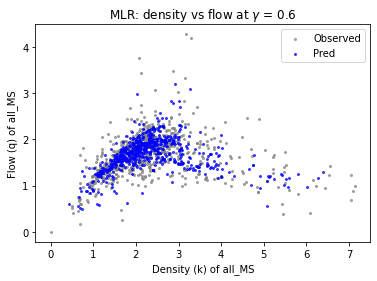

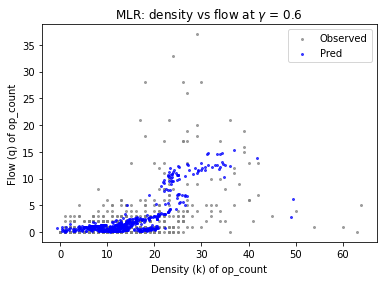

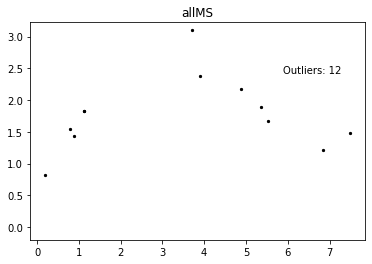

##################################################################
9 Scen0_qk 0.6
##################################################################


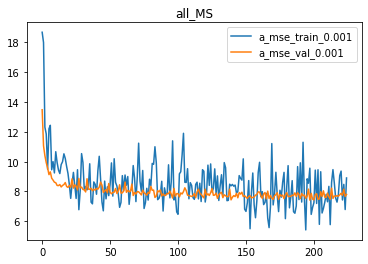

Output
 all_MS
FD factor: 0.6 - Num. outside of FD: 11

Input
['q_all_LD', 'k_all_LD']
Output
['q_all_MS', 'k_all_MS', 'stop_count', 'lane_changes']
##################################################################
9 Scen1_qk 0.6
##################################################################


C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: invalid value encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning: invalid value encountered in true_divide
  vTarget_woinf = t[:,qcols]/t[:,kcols]


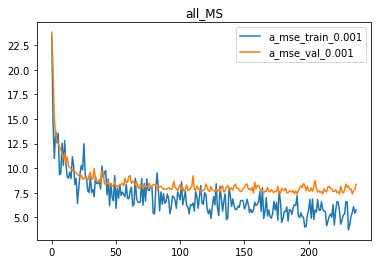

Output
 all_MS
FD factor: 0.6 - Num. outside of FD: 14

Input
['q_Taxi_MS', 'k_Taxi_MS', 'q_all_LD', 'k_all_LD', 'q_Car0050_MS', 'k_Car0050_MS']
Output
['q_all_MS', 'k_all_MS', 'stop_count', 'lane_changes']
##################################################################
9 Scen3_qk 0.6
##################################################################


C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: divide by zero encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: invalid value encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\OneDrive - TUM-VT\Dokumente\TSE_Bottleneck_TRB2022\TRB - Kopie\src\NNet.py:242: RuntimeWarning: invalid value encountered in true_divide
  avg_mape = [np.nanmean((abs((p[t[:,i]>1,i]-t[t[:,i]>1,i])/t[t[:,i]>1,i]))) for i in range(t.shape[1]) ]
C:\Users\ga59com\Anaconda3\envs\trb23wC\lib\site-packages\numpy\lib\function_base.py:2674: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning: divide by zero encountered in true_divide
  vTarget_woinf = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning

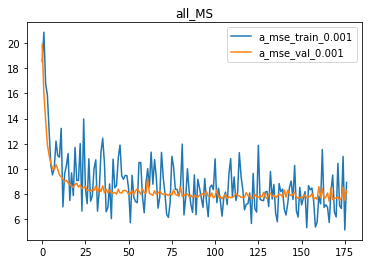

Output
 all_MS
FD factor: 0.6 - Num. outside of FD: 13

Input
['q_Bus_MS', 'k_Bus_MS', 'q_all_LD', 'k_all_LD', 'q_Car0050_MS', 'k_Car0050_MS']
Output
['q_all_MS', 'k_all_MS', 'stop_count', 'lane_changes']
##################################################################
9 Scen10_qk 0.6
##################################################################


C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: divide by zero encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: invalid value encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\OneDrive - TUM-VT\Dokumente\TSE_Bottleneck_TRB2022\TRB - Kopie\src\NNet.py:242: RuntimeWarning: invalid value encountered in true_divide
  avg_mape = [np.nanmean((abs((p[t[:,i]>1,i]-t[t[:,i]>1,i])/t[t[:,i]>1,i]))) for i in range(t.shape[1]) ]
C:\Users\ga59com\Anaconda3\envs\trb23wC\lib\site-packages\numpy\lib\function_base.py:2674: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning: divide by zero encountered in true_divide
  vTarget_woinf = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning

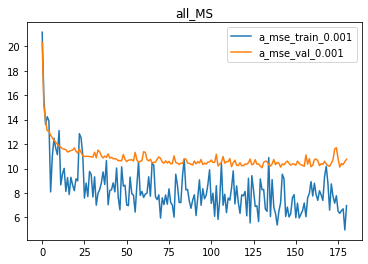

Output
 all_MS
FD factor: 0.6 - Num. outside of FD: 13

Input
['q_Car0050_MS', 'k_Car0050_MS', 'q_all_LD', 'k_all_LD']
Output
['q_all_MS', 'k_all_MS', 'stop_count', 'lane_changes']
##################################################################
9 Scen11_qk 0.6
##################################################################


C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: invalid value encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning: invalid value encountered in true_divide
  vTarget_woinf = t[:,qcols]/t[:,kcols]


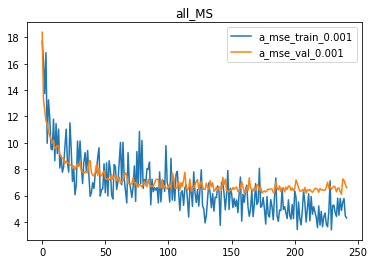

Output
 all_MS
FD factor: 0.6 - Num. outside of FD: 12

Input
['q_Car0050_MS', 'k_Car0050_MS', 'q_all_LD', 'k_all_LD', 'q_Bus_MS', 'k_Bus_MS', 'q_Taxi_MS', 'k_Taxi_MS']
Output
['q_all_MS', 'k_all_MS', 'stop_count', 'lane_changes']
Please set the FD type to 'D', 'T', or 'G'.


C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: invalid value encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning: invalid value encountered in true_divide
  vTarget_woinf = t[:,qcols]/t[:,kcols]


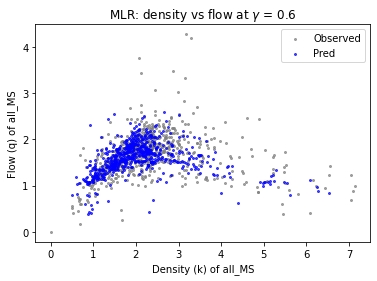

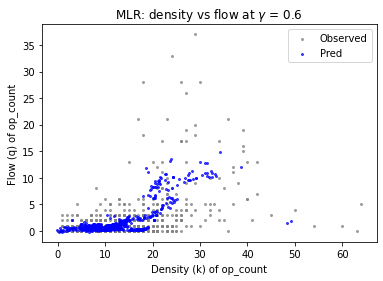

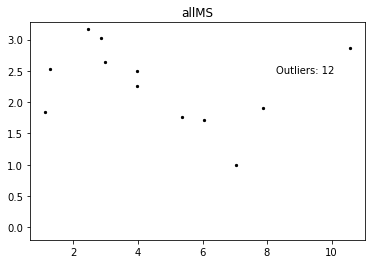

##################################################################
10 Scen0_qk 0.6
##################################################################


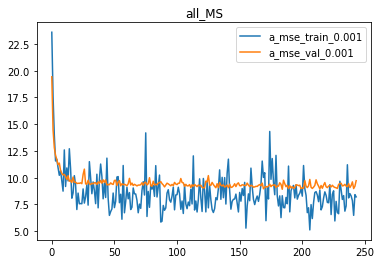

Output
 all_MS
FD factor: 0.6 - Num. outside of FD: 15

Input
['q_all_LD', 'k_all_LD']
Output
['q_all_MS', 'k_all_MS', 'stop_count', 'lane_changes']
##################################################################
10 Scen1_qk 0.6
##################################################################


C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: divide by zero encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: invalid value encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\OneDrive - TUM-VT\Dokumente\TSE_Bottleneck_TRB2022\TRB - Kopie\src\NNet.py:242: RuntimeWarning: invalid value encountered in true_divide
  avg_mape = [np.nanmean((abs((p[t[:,i]>1,i]-t[t[:,i]>1,i])/t[t[:,i]>1,i]))) for i in range(t.shape[1]) ]
C:\Users\ga59com\Anaconda3\envs\trb23wC\lib\site-packages\numpy\lib\function_base.py:2674: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning: divide by zero encountered in true_divide
  vTarget_woinf = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning

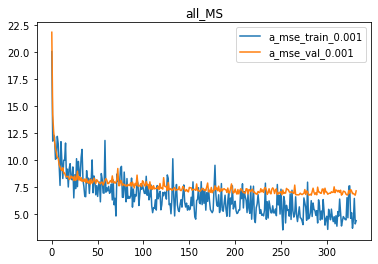

Output
 all_MS
FD factor: 0.6 - Num. outside of FD: 6

Input
['q_Taxi_MS', 'k_Taxi_MS', 'q_all_LD', 'k_all_LD', 'q_Car0050_MS', 'k_Car0050_MS']
Output
['q_all_MS', 'k_all_MS', 'stop_count', 'lane_changes']
##################################################################
10 Scen3_qk 0.6
##################################################################


C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: divide by zero encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: invalid value encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\OneDrive - TUM-VT\Dokumente\TSE_Bottleneck_TRB2022\TRB - Kopie\src\NNet.py:242: RuntimeWarning: invalid value encountered in true_divide
  avg_mape = [np.nanmean((abs((p[t[:,i]>1,i]-t[t[:,i]>1,i])/t[t[:,i]>1,i]))) for i in range(t.shape[1]) ]
C:\Users\ga59com\Anaconda3\envs\trb23wC\lib\site-packages\numpy\lib\function_base.py:2674: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning: divide by zero encountered in true_divide
  vTarget_woinf = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning

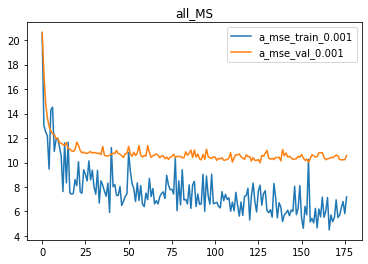

Output
 all_MS
FD factor: 0.6 - Num. outside of FD: 11

Input
['q_Bus_MS', 'k_Bus_MS', 'q_all_LD', 'k_all_LD', 'q_Car0050_MS', 'k_Car0050_MS']
Output
['q_all_MS', 'k_all_MS', 'stop_count', 'lane_changes']
##################################################################
10 Scen10_qk 0.6
##################################################################


C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: invalid value encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning: invalid value encountered in true_divide
  vTarget_woinf = t[:,qcols]/t[:,kcols]


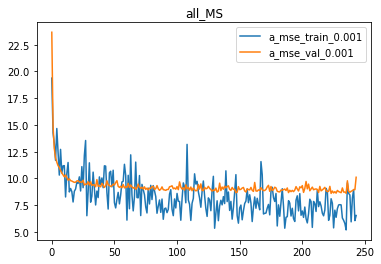

Output
 all_MS
FD factor: 0.6 - Num. outside of FD: 8

Input
['q_Car0050_MS', 'k_Car0050_MS', 'q_all_LD', 'k_all_LD']
Output
['q_all_MS', 'k_all_MS', 'stop_count', 'lane_changes']
##################################################################
10 Scen11_qk 0.6
##################################################################


C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: divide by zero encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: invalid value encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\OneDrive - TUM-VT\Dokumente\TSE_Bottleneck_TRB2022\TRB - Kopie\src\NNet.py:242: RuntimeWarning: invalid value encountered in true_divide
  avg_mape = [np.nanmean((abs((p[t[:,i]>1,i]-t[t[:,i]>1,i])/t[t[:,i]>1,i]))) for i in range(t.shape[1]) ]
C:\Users\ga59com\Anaconda3\envs\trb23wC\lib\site-packages\numpy\lib\function_base.py:2674: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning: divide by zero encountered in true_divide
  vTarget_woinf = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning

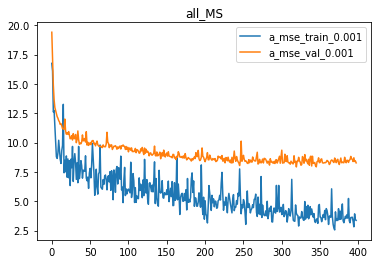

Output
 all_MS
FD factor: 0.6 - Num. outside of FD: 11

Input
['q_Car0050_MS', 'k_Car0050_MS', 'q_all_LD', 'k_all_LD', 'q_Bus_MS', 'k_Bus_MS', 'q_Taxi_MS', 'k_Taxi_MS']
Output
['q_all_MS', 'k_all_MS', 'stop_count', 'lane_changes']


C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: invalid value encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning: invalid value encountered in true_divide
  vTarget_woinf = t[:,qcols]/t[:,kcols]


Please set the FD type to 'D', 'T', or 'G'.


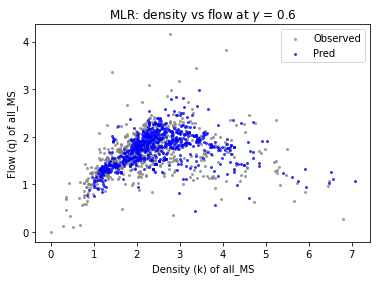

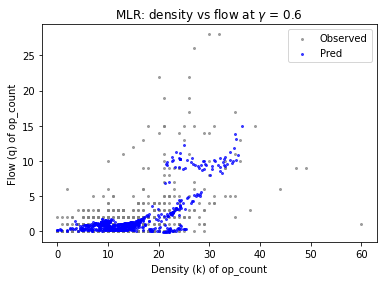

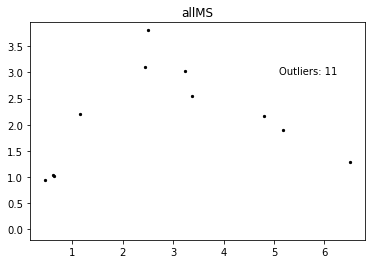

##################################################################
11 Scen0_qk 0.6
##################################################################


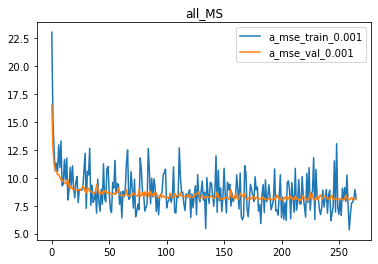

Output
 all_MS
FD factor: 0.6 - Num. outside of FD: 11

Input
['q_all_LD', 'k_all_LD']
Output
['q_all_MS', 'k_all_MS', 'stop_count', 'lane_changes']
##################################################################
11 Scen1_qk 0.6
##################################################################


C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: divide by zero encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: invalid value encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\OneDrive - TUM-VT\Dokumente\TSE_Bottleneck_TRB2022\TRB - Kopie\src\NNet.py:242: RuntimeWarning: invalid value encountered in true_divide
  avg_mape = [np.nanmean((abs((p[t[:,i]>1,i]-t[t[:,i]>1,i])/t[t[:,i]>1,i]))) for i in range(t.shape[1]) ]
C:\Users\ga59com\Anaconda3\envs\trb23wC\lib\site-packages\numpy\lib\function_base.py:2674: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning: divide by zero encountered in true_divide
  vTarget_woinf = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning

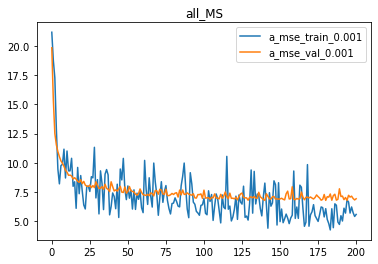

Output
 all_MS
FD factor: 0.6 - Num. outside of FD: 9

Input
['q_Taxi_MS', 'k_Taxi_MS', 'q_all_LD', 'k_all_LD', 'q_Car0050_MS', 'k_Car0050_MS']
Output
['q_all_MS', 'k_all_MS', 'stop_count', 'lane_changes']
##################################################################
11 Scen3_qk 0.6
##################################################################


C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: divide by zero encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: invalid value encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\OneDrive - TUM-VT\Dokumente\TSE_Bottleneck_TRB2022\TRB - Kopie\src\NNet.py:242: RuntimeWarning: invalid value encountered in true_divide
  avg_mape = [np.nanmean((abs((p[t[:,i]>1,i]-t[t[:,i]>1,i])/t[t[:,i]>1,i]))) for i in range(t.shape[1]) ]
C:\Users\ga59com\Anaconda3\envs\trb23wC\lib\site-packages\numpy\lib\function_base.py:2674: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning: divide by zero encountered in true_divide
  vTarget_woinf = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning

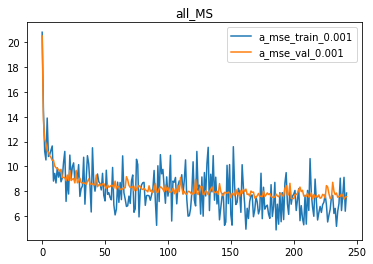

Output
 all_MS
FD factor: 0.6 - Num. outside of FD: 9

Input
['q_Bus_MS', 'k_Bus_MS', 'q_all_LD', 'k_all_LD', 'q_Car0050_MS', 'k_Car0050_MS']
Output
['q_all_MS', 'k_all_MS', 'stop_count', 'lane_changes']
##################################################################
11 Scen10_qk 0.6
##################################################################


C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: invalid value encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning: invalid value encountered in true_divide
  vTarget_woinf = t[:,qcols]/t[:,kcols]


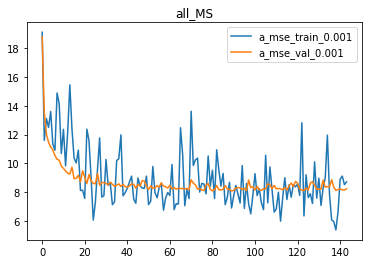

Output
 all_MS
FD factor: 0.6 - Num. outside of FD: 11

Input
['q_Car0050_MS', 'k_Car0050_MS', 'q_all_LD', 'k_all_LD']
Output
['q_all_MS', 'k_all_MS', 'stop_count', 'lane_changes']
##################################################################
11 Scen11_qk 0.6
##################################################################


C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: invalid value encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning: invalid value encountered in true_divide
  vTarget_woinf = t[:,qcols]/t[:,kcols]


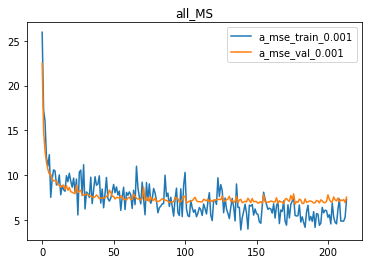

Output
 all_MS
FD factor: 0.6 - Num. outside of FD: 7

Input
['q_Car0050_MS', 'k_Car0050_MS', 'q_all_LD', 'k_all_LD', 'q_Bus_MS', 'k_Bus_MS', 'q_Taxi_MS', 'k_Taxi_MS']
Output
['q_all_MS', 'k_all_MS', 'stop_count', 'lane_changes']
Please set the FD type to 'D', 'T', or 'G'.


C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: divide by zero encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: invalid value encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\OneDrive - TUM-VT\Dokumente\TSE_Bottleneck_TRB2022\TRB - Kopie\src\NNet.py:242: RuntimeWarning: invalid value encountered in true_divide
  avg_mape = [np.nanmean((abs((p[t[:,i]>1,i]-t[t[:,i]>1,i])/t[t[:,i]>1,i]))) for i in range(t.shape[1]) ]
C:\Users\ga59com\Anaconda3\envs\trb23wC\lib\site-packages\numpy\lib\function_base.py:2674: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning: divide by zero encountered in true_divide
  vTarget_woinf = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning

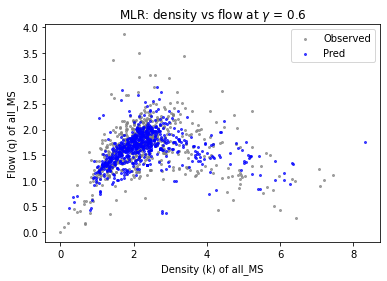

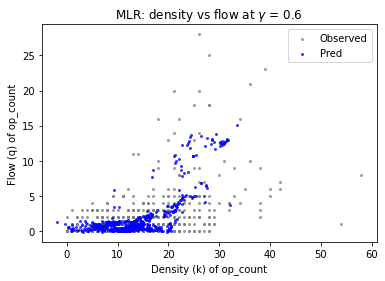

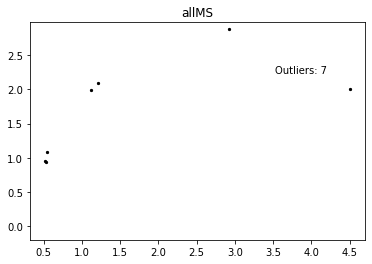

##################################################################
12 Scen0_qk 0.6
##################################################################


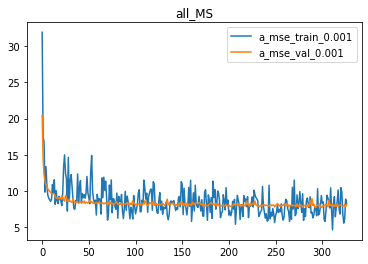

Output
 all_MS
FD factor: 0.6 - Num. outside of FD: 5

Input
['q_all_LD', 'k_all_LD']
Output
['q_all_MS', 'k_all_MS', 'stop_count', 'lane_changes']
##################################################################
12 Scen1_qk 0.6
##################################################################


C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: divide by zero encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: invalid value encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\OneDrive - TUM-VT\Dokumente\TSE_Bottleneck_TRB2022\TRB - Kopie\src\NNet.py:242: RuntimeWarning: invalid value encountered in true_divide
  avg_mape = [np.nanmean((abs((p[t[:,i]>1,i]-t[t[:,i]>1,i])/t[t[:,i]>1,i]))) for i in range(t.shape[1]) ]
C:\Users\ga59com\Anaconda3\envs\trb23wC\lib\site-packages\numpy\lib\function_base.py:2674: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning: divide by zero encountered in true_divide
  vTarget_woinf = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning

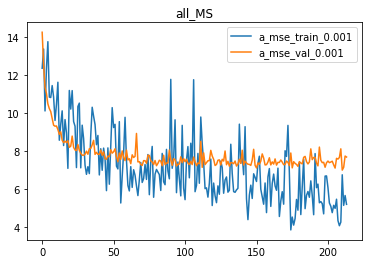

Output
 all_MS
FD factor: 0.6 - Num. outside of FD: 9

Input
['q_Taxi_MS', 'k_Taxi_MS', 'q_all_LD', 'k_all_LD', 'q_Car0050_MS', 'k_Car0050_MS']
Output
['q_all_MS', 'k_all_MS', 'stop_count', 'lane_changes']
##################################################################
12 Scen3_qk 0.6
##################################################################


C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: divide by zero encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: invalid value encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\OneDrive - TUM-VT\Dokumente\TSE_Bottleneck_TRB2022\TRB - Kopie\src\NNet.py:242: RuntimeWarning: invalid value encountered in true_divide
  avg_mape = [np.nanmean((abs((p[t[:,i]>1,i]-t[t[:,i]>1,i])/t[t[:,i]>1,i]))) for i in range(t.shape[1]) ]
C:\Users\ga59com\Anaconda3\envs\trb23wC\lib\site-packages\numpy\lib\function_base.py:2674: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning: divide by zero encountered in true_divide
  vTarget_woinf = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning

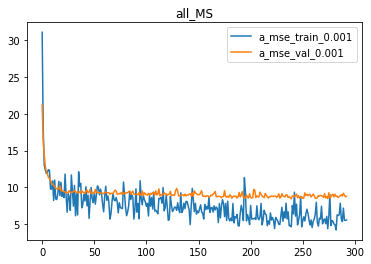

Output
 all_MS
FD factor: 0.6 - Num. outside of FD: 13

Input
['q_Bus_MS', 'k_Bus_MS', 'q_all_LD', 'k_all_LD', 'q_Car0050_MS', 'k_Car0050_MS']
Output
['q_all_MS', 'k_all_MS', 'stop_count', 'lane_changes']
##################################################################
12 Scen10_qk 0.6
##################################################################


C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: divide by zero encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: invalid value encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\OneDrive - TUM-VT\Dokumente\TSE_Bottleneck_TRB2022\TRB - Kopie\src\NNet.py:242: RuntimeWarning: invalid value encountered in true_divide
  avg_mape = [np.nanmean((abs((p[t[:,i]>1,i]-t[t[:,i]>1,i])/t[t[:,i]>1,i]))) for i in range(t.shape[1]) ]
C:\Users\ga59com\Anaconda3\envs\trb23wC\lib\site-packages\numpy\lib\function_base.py:2674: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning: divide by zero encountered in true_divide
  vTarget_woinf = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning

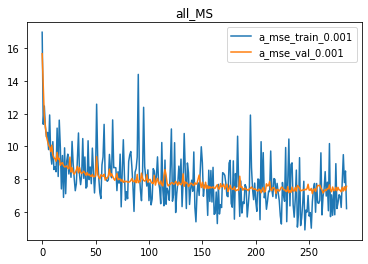

Output
 all_MS
FD factor: 0.6 - Num. outside of FD: 12

Input
['q_Car0050_MS', 'k_Car0050_MS', 'q_all_LD', 'k_all_LD']
Output
['q_all_MS', 'k_all_MS', 'stop_count', 'lane_changes']
##################################################################
12 Scen11_qk 0.6
##################################################################


C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: divide by zero encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: invalid value encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\OneDrive - TUM-VT\Dokumente\TSE_Bottleneck_TRB2022\TRB - Kopie\src\NNet.py:242: RuntimeWarning: invalid value encountered in true_divide
  avg_mape = [np.nanmean((abs((p[t[:,i]>1,i]-t[t[:,i]>1,i])/t[t[:,i]>1,i]))) for i in range(t.shape[1]) ]
C:\Users\ga59com\Anaconda3\envs\trb23wC\lib\site-packages\numpy\lib\function_base.py:2674: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning: divide by zero encountered in true_divide
  vTarget_woinf = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning

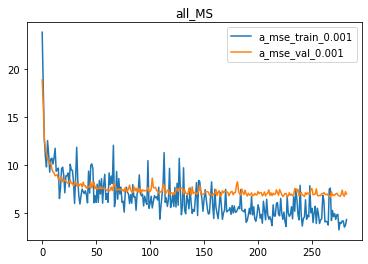

Output
 all_MS
FD factor: 0.6 - Num. outside of FD: 13

Input
['q_Car0050_MS', 'k_Car0050_MS', 'q_all_LD', 'k_all_LD', 'q_Bus_MS', 'k_Bus_MS', 'q_Taxi_MS', 'k_Taxi_MS']
Output
['q_all_MS', 'k_all_MS', 'stop_count', 'lane_changes']
Please set the FD type to 'D', 'T', or 'G'.


C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: divide by zero encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: invalid value encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\OneDrive - TUM-VT\Dokumente\TSE_Bottleneck_TRB2022\TRB - Kopie\src\NNet.py:242: RuntimeWarning: invalid value encountered in true_divide
  avg_mape = [np.nanmean((abs((p[t[:,i]>1,i]-t[t[:,i]>1,i])/t[t[:,i]>1,i]))) for i in range(t.shape[1]) ]
C:\Users\ga59com\Anaconda3\envs\trb23wC\lib\site-packages\numpy\lib\function_base.py:2674: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning: divide by zero encountered in true_divide
  vTarget_woinf = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning

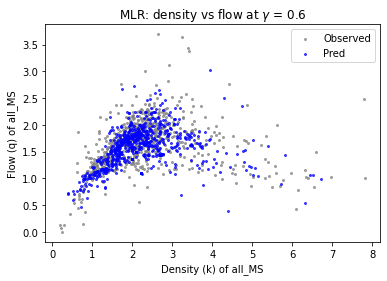

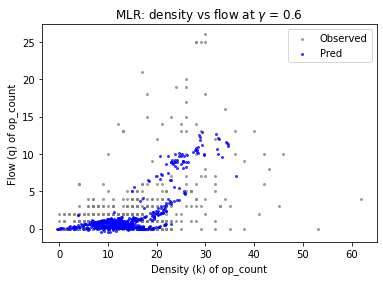

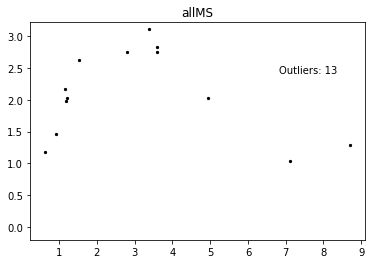

##################################################################
13 Scen0_qk 0.6
##################################################################


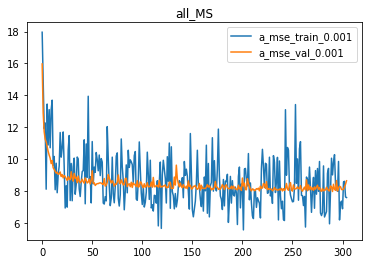

Output
 all_MS
FD factor: 0.6 - Num. outside of FD: 10

Input
['q_all_LD', 'k_all_LD']
Output
['q_all_MS', 'k_all_MS', 'stop_count', 'lane_changes']
##################################################################
13 Scen1_qk 0.6
##################################################################


C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: divide by zero encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: invalid value encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\OneDrive - TUM-VT\Dokumente\TSE_Bottleneck_TRB2022\TRB - Kopie\src\NNet.py:242: RuntimeWarning: invalid value encountered in true_divide
  avg_mape = [np.nanmean((abs((p[t[:,i]>1,i]-t[t[:,i]>1,i])/t[t[:,i]>1,i]))) for i in range(t.shape[1]) ]
C:\Users\ga59com\Anaconda3\envs\trb23wC\lib\site-packages\numpy\lib\function_base.py:2674: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning: divide by zero encountered in true_divide
  vTarget_woinf = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning

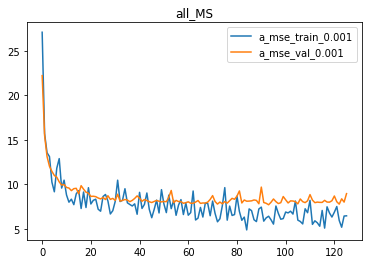

Output
 all_MS
FD factor: 0.6 - Num. outside of FD: 6

Input
['q_Taxi_MS', 'k_Taxi_MS', 'q_all_LD', 'k_all_LD', 'q_Car0050_MS', 'k_Car0050_MS']
Output
['q_all_MS', 'k_all_MS', 'stop_count', 'lane_changes']
##################################################################
13 Scen3_qk 0.6
##################################################################


C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: invalid value encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning: invalid value encountered in true_divide
  vTarget_woinf = t[:,qcols]/t[:,kcols]


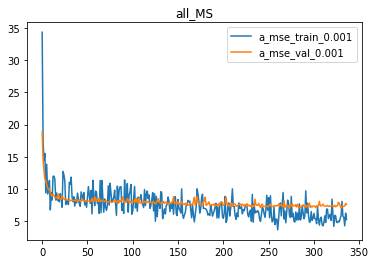

Output
 all_MS
FD factor: 0.6 - Num. outside of FD: 9

Input
['q_Bus_MS', 'k_Bus_MS', 'q_all_LD', 'k_all_LD', 'q_Car0050_MS', 'k_Car0050_MS']
Output
['q_all_MS', 'k_all_MS', 'stop_count', 'lane_changes']
##################################################################
13 Scen10_qk 0.6
##################################################################


C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: divide by zero encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: invalid value encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\OneDrive - TUM-VT\Dokumente\TSE_Bottleneck_TRB2022\TRB - Kopie\src\NNet.py:242: RuntimeWarning: invalid value encountered in true_divide
  avg_mape = [np.nanmean((abs((p[t[:,i]>1,i]-t[t[:,i]>1,i])/t[t[:,i]>1,i]))) for i in range(t.shape[1]) ]
C:\Users\ga59com\Anaconda3\envs\trb23wC\lib\site-packages\numpy\lib\function_base.py:2674: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning: divide by zero encountered in true_divide
  vTarget_woinf = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning

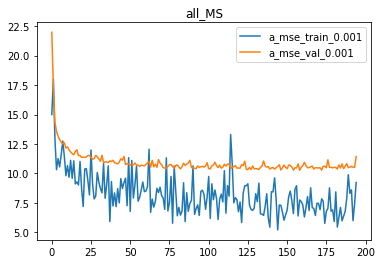

Output
 all_MS
FD factor: 0.6 - Num. outside of FD: 13

Input
['q_Car0050_MS', 'k_Car0050_MS', 'q_all_LD', 'k_all_LD']
Output
['q_all_MS', 'k_all_MS', 'stop_count', 'lane_changes']
##################################################################
13 Scen11_qk 0.6
##################################################################


C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: invalid value encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning: invalid value encountered in true_divide
  vTarget_woinf = t[:,qcols]/t[:,kcols]


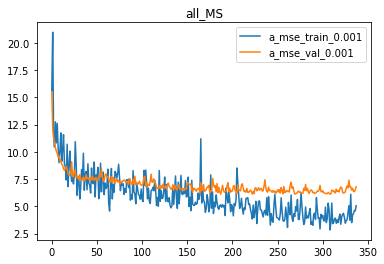

Output
 all_MS
FD factor: 0.6 - Num. outside of FD: 7

Input
['q_Car0050_MS', 'k_Car0050_MS', 'q_all_LD', 'k_all_LD', 'q_Bus_MS', 'k_Bus_MS', 'q_Taxi_MS', 'k_Taxi_MS']
Output
['q_all_MS', 'k_all_MS', 'stop_count', 'lane_changes']
Please set the FD type to 'D', 'T', or 'G'.


C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: invalid value encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning: invalid value encountered in true_divide
  vTarget_woinf = t[:,qcols]/t[:,kcols]


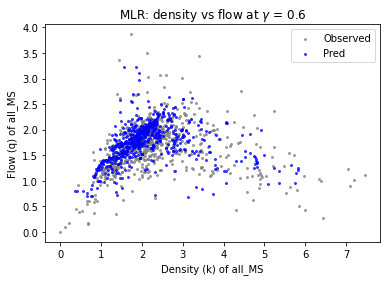

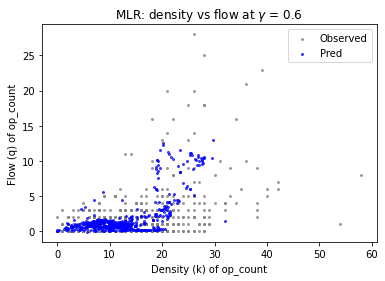

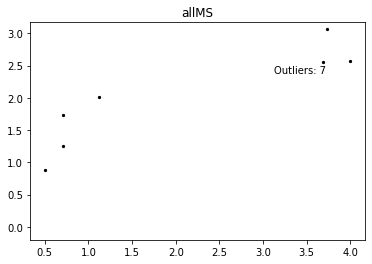

##################################################################
14 Scen0_qk 0.6
##################################################################


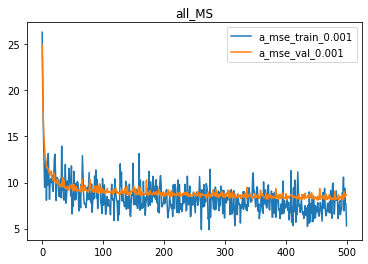

Output
 all_MS
FD factor: 0.6 - Num. outside of FD: 13

Input
['q_all_LD', 'k_all_LD']
Output
['q_all_MS', 'k_all_MS', 'stop_count', 'lane_changes']
##################################################################
14 Scen1_qk 0.6
##################################################################


C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: divide by zero encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: invalid value encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\OneDrive - TUM-VT\Dokumente\TSE_Bottleneck_TRB2022\TRB - Kopie\src\NNet.py:242: RuntimeWarning: invalid value encountered in true_divide
  avg_mape = [np.nanmean((abs((p[t[:,i]>1,i]-t[t[:,i]>1,i])/t[t[:,i]>1,i]))) for i in range(t.shape[1]) ]
C:\Users\ga59com\Anaconda3\envs\trb23wC\lib\site-packages\numpy\lib\function_base.py:2674: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning: divide by zero encountered in true_divide
  vTarget_woinf = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning

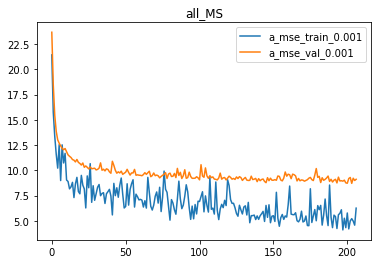

Output
 all_MS
FD factor: 0.6 - Num. outside of FD: 9

Input
['q_Taxi_MS', 'k_Taxi_MS', 'q_all_LD', 'k_all_LD', 'q_Car0050_MS', 'k_Car0050_MS']
Output
['q_all_MS', 'k_all_MS', 'stop_count', 'lane_changes']
##################################################################
14 Scen3_qk 0.6
##################################################################


C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: invalid value encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning: invalid value encountered in true_divide
  vTarget_woinf = t[:,qcols]/t[:,kcols]


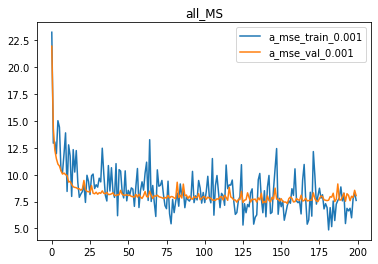

Output
 all_MS
FD factor: 0.6 - Num. outside of FD: 14

Input
['q_Bus_MS', 'k_Bus_MS', 'q_all_LD', 'k_all_LD', 'q_Car0050_MS', 'k_Car0050_MS']
Output
['q_all_MS', 'k_all_MS', 'stop_count', 'lane_changes']
##################################################################
14 Scen10_qk 0.6
##################################################################


C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: divide by zero encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: invalid value encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\OneDrive - TUM-VT\Dokumente\TSE_Bottleneck_TRB2022\TRB - Kopie\src\NNet.py:242: RuntimeWarning: invalid value encountered in true_divide
  avg_mape = [np.nanmean((abs((p[t[:,i]>1,i]-t[t[:,i]>1,i])/t[t[:,i]>1,i]))) for i in range(t.shape[1]) ]
C:\Users\ga59com\Anaconda3\envs\trb23wC\lib\site-packages\numpy\lib\function_base.py:2674: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning: divide by zero encountered in true_divide
  vTarget_woinf = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning

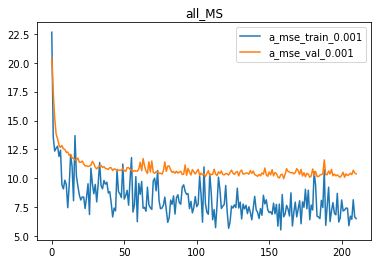

Output
 all_MS
FD factor: 0.6 - Num. outside of FD: 8

Input
['q_Car0050_MS', 'k_Car0050_MS', 'q_all_LD', 'k_all_LD']
Output
['q_all_MS', 'k_all_MS', 'stop_count', 'lane_changes']
##################################################################
14 Scen11_qk 0.6
##################################################################


C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: invalid value encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning: invalid value encountered in true_divide
  vTarget_woinf = t[:,qcols]/t[:,kcols]


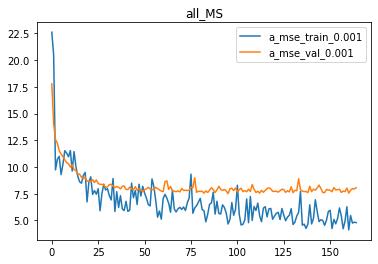

Output
 all_MS
FD factor: 0.6 - Num. outside of FD: 17

Input
['q_Car0050_MS', 'k_Car0050_MS', 'q_all_LD', 'k_all_LD', 'q_Bus_MS', 'k_Bus_MS', 'q_Taxi_MS', 'k_Taxi_MS']
Output
['q_all_MS', 'k_all_MS', 'stop_count', 'lane_changes']
Please set the FD type to 'D', 'T', or 'G'.


C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: invalid value encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning: invalid value encountered in true_divide
  vTarget_woinf = t[:,qcols]/t[:,kcols]


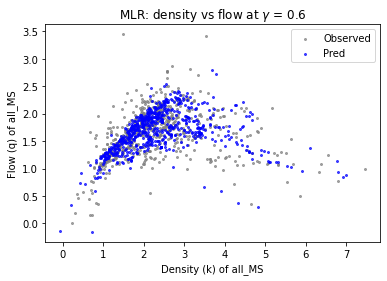

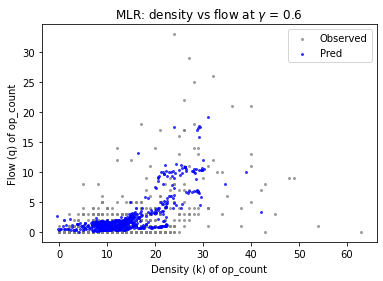

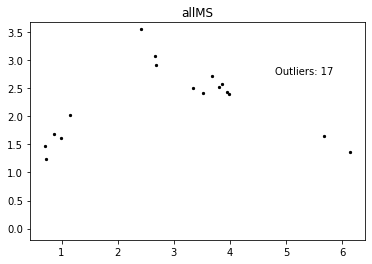

##################################################################
15 Scen0_qk 0.6
##################################################################


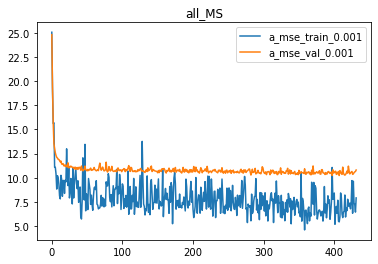

Output
 all_MS
FD factor: 0.6 - Num. outside of FD: 16

Input
['q_all_LD', 'k_all_LD']
Output
['q_all_MS', 'k_all_MS', 'stop_count', 'lane_changes']
##################################################################
15 Scen1_qk 0.6
##################################################################


C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: invalid value encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning: invalid value encountered in true_divide
  vTarget_woinf = t[:,qcols]/t[:,kcols]


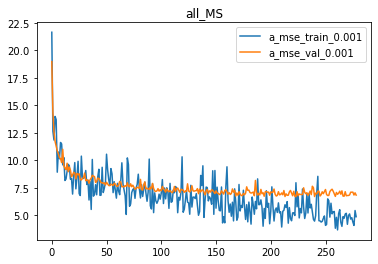

Output
 all_MS
FD factor: 0.6 - Num. outside of FD: 16

Input
['q_Taxi_MS', 'k_Taxi_MS', 'q_all_LD', 'k_all_LD', 'q_Car0050_MS', 'k_Car0050_MS']
Output
['q_all_MS', 'k_all_MS', 'stop_count', 'lane_changes']
##################################################################
15 Scen3_qk 0.6
##################################################################


C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: divide by zero encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: invalid value encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\OneDrive - TUM-VT\Dokumente\TSE_Bottleneck_TRB2022\TRB - Kopie\src\NNet.py:242: RuntimeWarning: invalid value encountered in true_divide
  avg_mape = [np.nanmean((abs((p[t[:,i]>1,i]-t[t[:,i]>1,i])/t[t[:,i]>1,i]))) for i in range(t.shape[1]) ]
C:\Users\ga59com\Anaconda3\envs\trb23wC\lib\site-packages\numpy\lib\function_base.py:2674: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning: divide by zero encountered in true_divide
  vTarget_woinf = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning

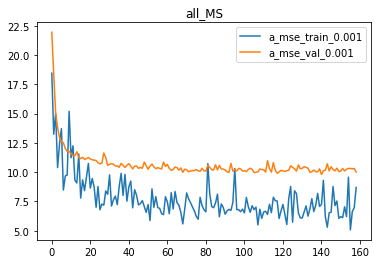

Output
 all_MS
FD factor: 0.6 - Num. outside of FD: 12

Input
['q_Bus_MS', 'k_Bus_MS', 'q_all_LD', 'k_all_LD', 'q_Car0050_MS', 'k_Car0050_MS']
Output
['q_all_MS', 'k_all_MS', 'stop_count', 'lane_changes']
##################################################################
15 Scen10_qk 0.6
##################################################################


C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: invalid value encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning: invalid value encountered in true_divide
  vTarget_woinf = t[:,qcols]/t[:,kcols]


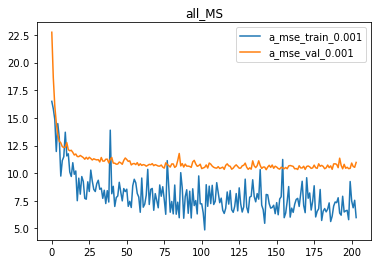

Output
 all_MS
FD factor: 0.6 - Num. outside of FD: 17

Input
['q_Car0050_MS', 'k_Car0050_MS', 'q_all_LD', 'k_all_LD']
Output
['q_all_MS', 'k_all_MS', 'stop_count', 'lane_changes']
##################################################################
15 Scen11_qk 0.6
##################################################################


C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: invalid value encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning: invalid value encountered in true_divide
  vTarget_woinf = t[:,qcols]/t[:,kcols]


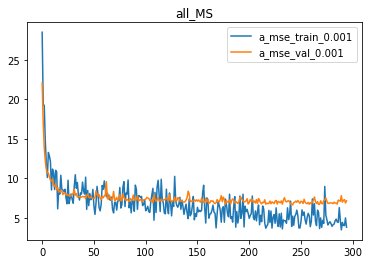

Output
 all_MS
FD factor: 0.6 - Num. outside of FD: 14

Input
['q_Car0050_MS', 'k_Car0050_MS', 'q_all_LD', 'k_all_LD', 'q_Bus_MS', 'k_Bus_MS', 'q_Taxi_MS', 'k_Taxi_MS']
Output
['q_all_MS', 'k_all_MS', 'stop_count', 'lane_changes']
Please set the FD type to 'D', 'T', or 'G'.


C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: divide by zero encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: invalid value encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\OneDrive - TUM-VT\Dokumente\TSE_Bottleneck_TRB2022\TRB - Kopie\src\NNet.py:242: RuntimeWarning: invalid value encountered in true_divide
  avg_mape = [np.nanmean((abs((p[t[:,i]>1,i]-t[t[:,i]>1,i])/t[t[:,i]>1,i]))) for i in range(t.shape[1]) ]
C:\Users\ga59com\Anaconda3\envs\trb23wC\lib\site-packages\numpy\lib\function_base.py:2674: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning: divide by zero encountered in true_divide
  vTarget_woinf = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning

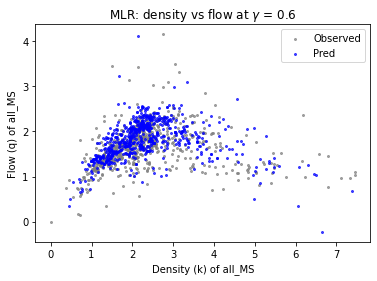

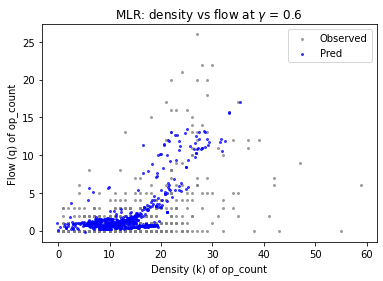

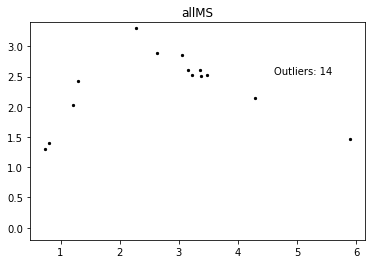

##################################################################
16 Scen0_qk 0.6
##################################################################


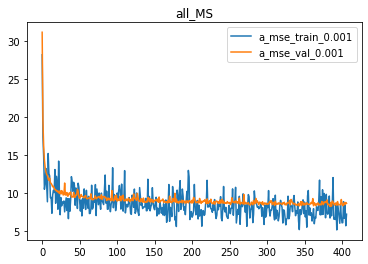

Output
 all_MS
FD factor: 0.6 - Num. outside of FD: 6

Input
['q_all_LD', 'k_all_LD']
Output
['q_all_MS', 'k_all_MS', 'stop_count', 'lane_changes']
##################################################################
16 Scen1_qk 0.6
##################################################################


C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: divide by zero encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: invalid value encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\OneDrive - TUM-VT\Dokumente\TSE_Bottleneck_TRB2022\TRB - Kopie\src\NNet.py:242: RuntimeWarning: invalid value encountered in true_divide
  avg_mape = [np.nanmean((abs((p[t[:,i]>1,i]-t[t[:,i]>1,i])/t[t[:,i]>1,i]))) for i in range(t.shape[1]) ]
C:\Users\ga59com\Anaconda3\envs\trb23wC\lib\site-packages\numpy\lib\function_base.py:2674: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning: divide by zero encountered in true_divide
  vTarget_woinf = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning

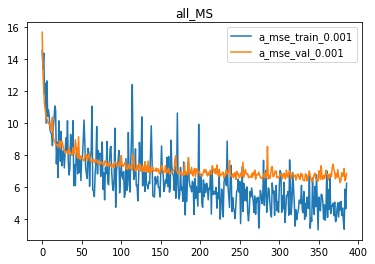

Output
 all_MS
FD factor: 0.6 - Num. outside of FD: 8

Input
['q_Taxi_MS', 'k_Taxi_MS', 'q_all_LD', 'k_all_LD', 'q_Car0050_MS', 'k_Car0050_MS']
Output
['q_all_MS', 'k_all_MS', 'stop_count', 'lane_changes']
##################################################################
16 Scen3_qk 0.6
##################################################################


C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: divide by zero encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: invalid value encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\OneDrive - TUM-VT\Dokumente\TSE_Bottleneck_TRB2022\TRB - Kopie\src\NNet.py:242: RuntimeWarning: invalid value encountered in true_divide
  avg_mape = [np.nanmean((abs((p[t[:,i]>1,i]-t[t[:,i]>1,i])/t[t[:,i]>1,i]))) for i in range(t.shape[1]) ]
C:\Users\ga59com\Anaconda3\envs\trb23wC\lib\site-packages\numpy\lib\function_base.py:2674: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning: divide by zero encountered in true_divide
  vTarget_woinf = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning

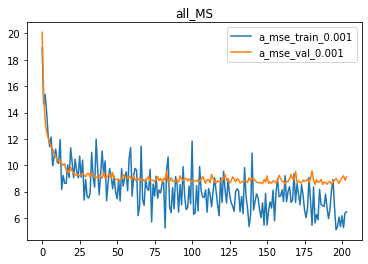

Output
 all_MS
FD factor: 0.6 - Num. outside of FD: 11

Input
['q_Bus_MS', 'k_Bus_MS', 'q_all_LD', 'k_all_LD', 'q_Car0050_MS', 'k_Car0050_MS']
Output
['q_all_MS', 'k_all_MS', 'stop_count', 'lane_changes']
##################################################################
16 Scen10_qk 0.6
##################################################################


C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: invalid value encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning: invalid value encountered in true_divide
  vTarget_woinf = t[:,qcols]/t[:,kcols]


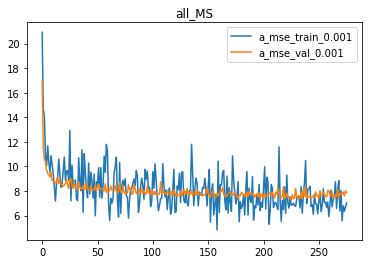

Output
 all_MS
FD factor: 0.6 - Num. outside of FD: 6

Input
['q_Car0050_MS', 'k_Car0050_MS', 'q_all_LD', 'k_all_LD']
Output
['q_all_MS', 'k_all_MS', 'stop_count', 'lane_changes']
##################################################################
16 Scen11_qk 0.6
##################################################################


C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: invalid value encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning: invalid value encountered in true_divide
  vTarget_woinf = t[:,qcols]/t[:,kcols]


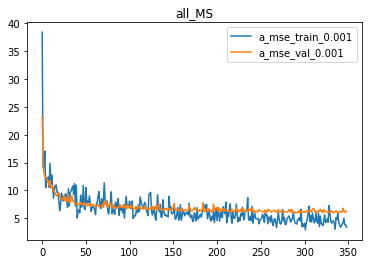

Output
 all_MS
FD factor: 0.6 - Num. outside of FD: 9

Input
['q_Car0050_MS', 'k_Car0050_MS', 'q_all_LD', 'k_all_LD', 'q_Bus_MS', 'k_Bus_MS', 'q_Taxi_MS', 'k_Taxi_MS']
Output
['q_all_MS', 'k_all_MS', 'stop_count', 'lane_changes']
Please set the FD type to 'D', 'T', or 'G'.


C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: invalid value encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning: invalid value encountered in true_divide
  vTarget_woinf = t[:,qcols]/t[:,kcols]


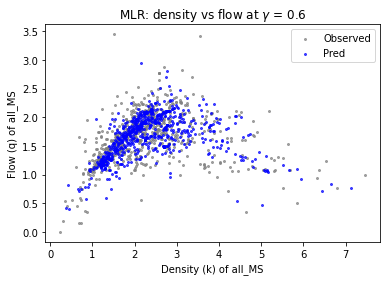

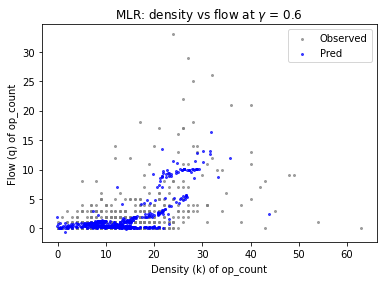

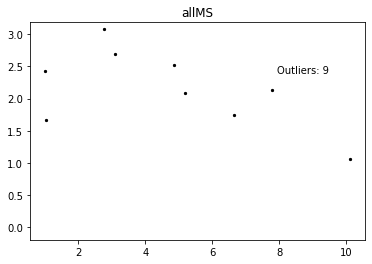

##################################################################
17 Scen0_qk 0.6
##################################################################


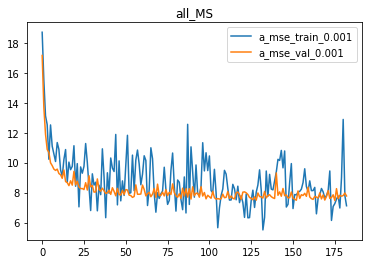

Output
 all_MS
FD factor: 0.6 - Num. outside of FD: 1

Input
['q_all_LD', 'k_all_LD']
Output
['q_all_MS', 'k_all_MS', 'stop_count', 'lane_changes']
##################################################################
17 Scen1_qk 0.6
##################################################################


C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: invalid value encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning: invalid value encountered in true_divide
  vTarget_woinf = t[:,qcols]/t[:,kcols]


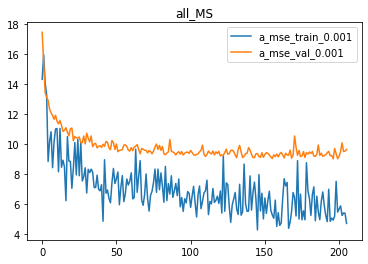

Output
 all_MS
FD factor: 0.6 - Num. outside of FD: 18

Input
['q_Taxi_MS', 'k_Taxi_MS', 'q_all_LD', 'k_all_LD', 'q_Car0050_MS', 'k_Car0050_MS']
Output
['q_all_MS', 'k_all_MS', 'stop_count', 'lane_changes']
##################################################################
17 Scen3_qk 0.6
##################################################################


C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: invalid value encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning: invalid value encountered in true_divide
  vTarget_woinf = t[:,qcols]/t[:,kcols]


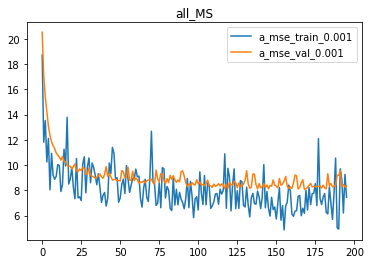

Output
 all_MS
FD factor: 0.6 - Num. outside of FD: 11

Input
['q_Bus_MS', 'k_Bus_MS', 'q_all_LD', 'k_all_LD', 'q_Car0050_MS', 'k_Car0050_MS']
Output
['q_all_MS', 'k_all_MS', 'stop_count', 'lane_changes']
##################################################################
17 Scen10_qk 0.6
##################################################################


C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: divide by zero encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: invalid value encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\OneDrive - TUM-VT\Dokumente\TSE_Bottleneck_TRB2022\TRB - Kopie\src\NNet.py:242: RuntimeWarning: invalid value encountered in true_divide
  avg_mape = [np.nanmean((abs((p[t[:,i]>1,i]-t[t[:,i]>1,i])/t[t[:,i]>1,i]))) for i in range(t.shape[1]) ]
C:\Users\ga59com\Anaconda3\envs\trb23wC\lib\site-packages\numpy\lib\function_base.py:2674: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning: divide by zero encountered in true_divide
  vTarget_woinf = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning

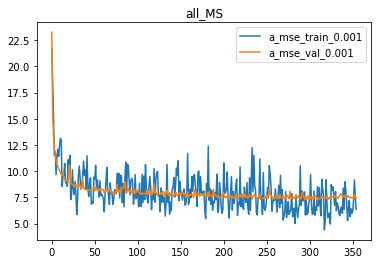

Output
 all_MS
FD factor: 0.6 - Num. outside of FD: 6

Input
['q_Car0050_MS', 'k_Car0050_MS', 'q_all_LD', 'k_all_LD']
Output
['q_all_MS', 'k_all_MS', 'stop_count', 'lane_changes']
##################################################################
17 Scen11_qk 0.6
##################################################################


C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: divide by zero encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: invalid value encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\OneDrive - TUM-VT\Dokumente\TSE_Bottleneck_TRB2022\TRB - Kopie\src\NNet.py:242: RuntimeWarning: invalid value encountered in true_divide
  avg_mape = [np.nanmean((abs((p[t[:,i]>1,i]-t[t[:,i]>1,i])/t[t[:,i]>1,i]))) for i in range(t.shape[1]) ]
C:\Users\ga59com\Anaconda3\envs\trb23wC\lib\site-packages\numpy\lib\function_base.py:2674: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning: divide by zero encountered in true_divide
  vTarget_woinf = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning

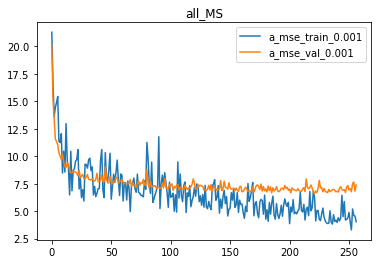

Output
 all_MS
FD factor: 0.6 - Num. outside of FD: 14

Input
['q_Car0050_MS', 'k_Car0050_MS', 'q_all_LD', 'k_all_LD', 'q_Bus_MS', 'k_Bus_MS', 'q_Taxi_MS', 'k_Taxi_MS']
Output
['q_all_MS', 'k_all_MS', 'stop_count', 'lane_changes']
Please set the FD type to 'D', 'T', or 'G'.


C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: invalid value encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning: invalid value encountered in true_divide
  vTarget_woinf = t[:,qcols]/t[:,kcols]


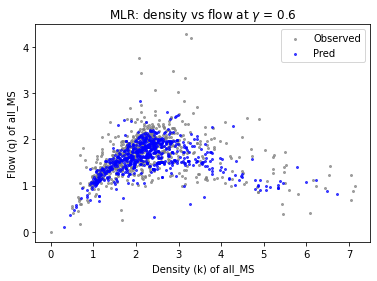

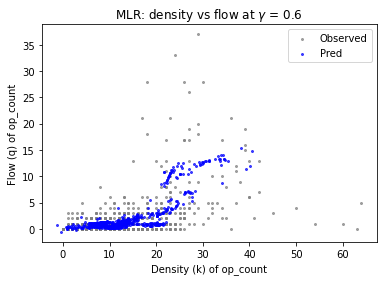

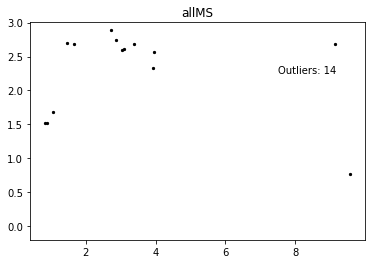

##################################################################
18 Scen0_qk 0.6
##################################################################


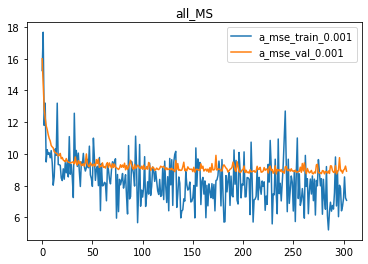

Output
 all_MS
FD factor: 0.6 - Num. outside of FD: 2

Input
['q_all_LD', 'k_all_LD']
Output
['q_all_MS', 'k_all_MS', 'stop_count', 'lane_changes']
##################################################################
18 Scen1_qk 0.6
##################################################################


C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: invalid value encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning: invalid value encountered in true_divide
  vTarget_woinf = t[:,qcols]/t[:,kcols]


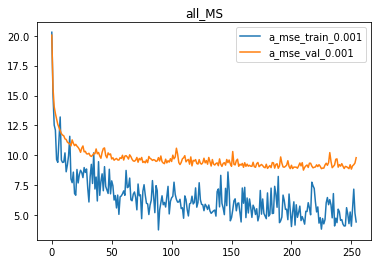

Output
 all_MS
FD factor: 0.6 - Num. outside of FD: 16

Input
['q_Taxi_MS', 'k_Taxi_MS', 'q_all_LD', 'k_all_LD', 'q_Car0050_MS', 'k_Car0050_MS']
Output
['q_all_MS', 'k_all_MS', 'stop_count', 'lane_changes']
##################################################################
18 Scen3_qk 0.6
##################################################################


C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: invalid value encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning: invalid value encountered in true_divide
  vTarget_woinf = t[:,qcols]/t[:,kcols]


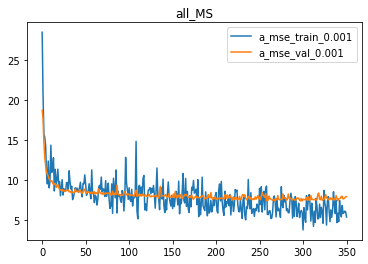

Output
 all_MS
FD factor: 0.6 - Num. outside of FD: 10

Input
['q_Bus_MS', 'k_Bus_MS', 'q_all_LD', 'k_all_LD', 'q_Car0050_MS', 'k_Car0050_MS']
Output
['q_all_MS', 'k_all_MS', 'stop_count', 'lane_changes']
##################################################################
18 Scen10_qk 0.6
##################################################################


C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: divide by zero encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: invalid value encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\OneDrive - TUM-VT\Dokumente\TSE_Bottleneck_TRB2022\TRB - Kopie\src\NNet.py:242: RuntimeWarning: invalid value encountered in true_divide
  avg_mape = [np.nanmean((abs((p[t[:,i]>1,i]-t[t[:,i]>1,i])/t[t[:,i]>1,i]))) for i in range(t.shape[1]) ]
C:\Users\ga59com\Anaconda3\envs\trb23wC\lib\site-packages\numpy\lib\function_base.py:2674: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning: divide by zero encountered in true_divide
  vTarget_woinf = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning

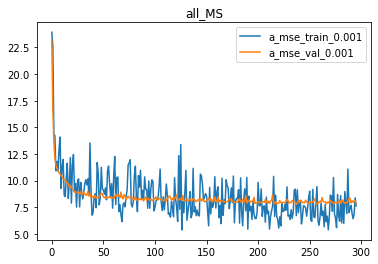

Output
 all_MS
FD factor: 0.6 - Num. outside of FD: 13

Input
['q_Car0050_MS', 'k_Car0050_MS', 'q_all_LD', 'k_all_LD']
Output
['q_all_MS', 'k_all_MS', 'stop_count', 'lane_changes']
##################################################################
18 Scen11_qk 0.6
##################################################################


C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: divide by zero encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: invalid value encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\OneDrive - TUM-VT\Dokumente\TSE_Bottleneck_TRB2022\TRB - Kopie\src\NNet.py:242: RuntimeWarning: invalid value encountered in true_divide
  avg_mape = [np.nanmean((abs((p[t[:,i]>1,i]-t[t[:,i]>1,i])/t[t[:,i]>1,i]))) for i in range(t.shape[1]) ]
C:\Users\ga59com\Anaconda3\envs\trb23wC\lib\site-packages\numpy\lib\function_base.py:2674: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning: divide by zero encountered in true_divide
  vTarget_woinf = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning

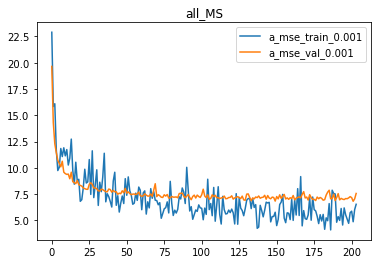

Output
 all_MS
FD factor: 0.6 - Num. outside of FD: 6

Input
['q_Car0050_MS', 'k_Car0050_MS', 'q_all_LD', 'k_all_LD', 'q_Bus_MS', 'k_Bus_MS', 'q_Taxi_MS', 'k_Taxi_MS']
Output
['q_all_MS', 'k_all_MS', 'stop_count', 'lane_changes']
Please set the FD type to 'D', 'T', or 'G'.


C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: divide by zero encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: invalid value encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\OneDrive - TUM-VT\Dokumente\TSE_Bottleneck_TRB2022\TRB - Kopie\src\NNet.py:242: RuntimeWarning: invalid value encountered in true_divide
  avg_mape = [np.nanmean((abs((p[t[:,i]>1,i]-t[t[:,i]>1,i])/t[t[:,i]>1,i]))) for i in range(t.shape[1]) ]
C:\Users\ga59com\Anaconda3\envs\trb23wC\lib\site-packages\numpy\lib\function_base.py:2674: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning: divide by zero encountered in true_divide
  vTarget_woinf = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning

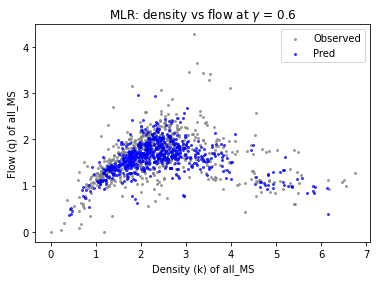

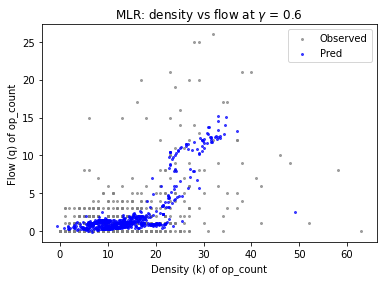

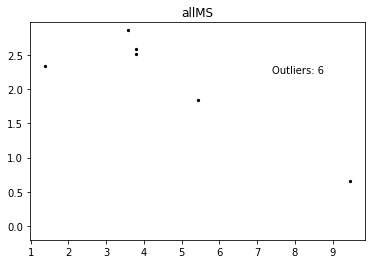

##################################################################
19 Scen0_qk 0.6
##################################################################


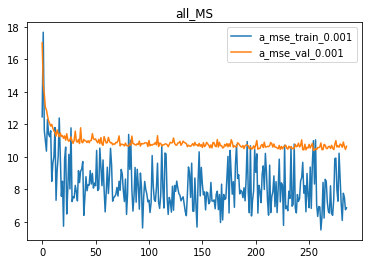

Output
 all_MS
FD factor: 0.6 - Num. outside of FD: 12

Input
['q_all_LD', 'k_all_LD']
Output
['q_all_MS', 'k_all_MS', 'stop_count', 'lane_changes']
##################################################################
19 Scen1_qk 0.6
##################################################################


C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: invalid value encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning: invalid value encountered in true_divide
  vTarget_woinf = t[:,qcols]/t[:,kcols]


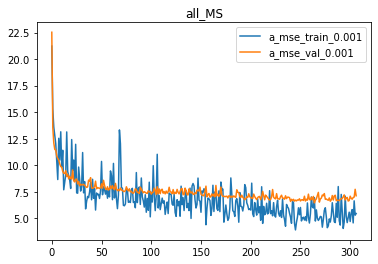

Output
 all_MS
FD factor: 0.6 - Num. outside of FD: 8

Input
['q_Taxi_MS', 'k_Taxi_MS', 'q_all_LD', 'k_all_LD', 'q_Car0050_MS', 'k_Car0050_MS']
Output
['q_all_MS', 'k_all_MS', 'stop_count', 'lane_changes']
##################################################################
19 Scen3_qk 0.6
##################################################################


C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: divide by zero encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: invalid value encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\OneDrive - TUM-VT\Dokumente\TSE_Bottleneck_TRB2022\TRB - Kopie\src\NNet.py:242: RuntimeWarning: invalid value encountered in true_divide
  avg_mape = [np.nanmean((abs((p[t[:,i]>1,i]-t[t[:,i]>1,i])/t[t[:,i]>1,i]))) for i in range(t.shape[1]) ]
C:\Users\ga59com\Anaconda3\envs\trb23wC\lib\site-packages\numpy\lib\function_base.py:2674: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning: divide by zero encountered in true_divide
  vTarget_woinf = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning

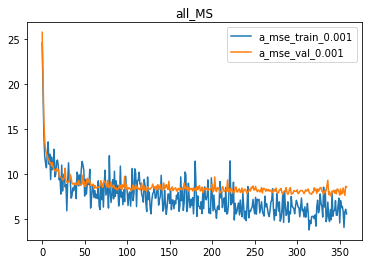

Output
 all_MS
FD factor: 0.6 - Num. outside of FD: 1

Input
['q_Bus_MS', 'k_Bus_MS', 'q_all_LD', 'k_all_LD', 'q_Car0050_MS', 'k_Car0050_MS']
Output
['q_all_MS', 'k_all_MS', 'stop_count', 'lane_changes']
##################################################################
19 Scen10_qk 0.6
##################################################################


C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: divide by zero encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: invalid value encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\OneDrive - TUM-VT\Dokumente\TSE_Bottleneck_TRB2022\TRB - Kopie\src\NNet.py:242: RuntimeWarning: invalid value encountered in true_divide
  avg_mape = [np.nanmean((abs((p[t[:,i]>1,i]-t[t[:,i]>1,i])/t[t[:,i]>1,i]))) for i in range(t.shape[1]) ]
C:\Users\ga59com\Anaconda3\envs\trb23wC\lib\site-packages\numpy\lib\function_base.py:2674: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning: divide by zero encountered in true_divide
  vTarget_woinf = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning

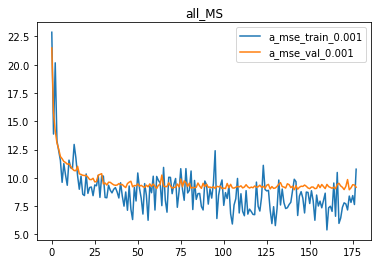

Output
 all_MS
FD factor: 0.6 - Num. outside of FD: 6

Input
['q_Car0050_MS', 'k_Car0050_MS', 'q_all_LD', 'k_all_LD']
Output
['q_all_MS', 'k_all_MS', 'stop_count', 'lane_changes']
##################################################################
19 Scen11_qk 0.6
##################################################################


C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: invalid value encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning: invalid value encountered in true_divide
  vTarget_woinf = t[:,qcols]/t[:,kcols]


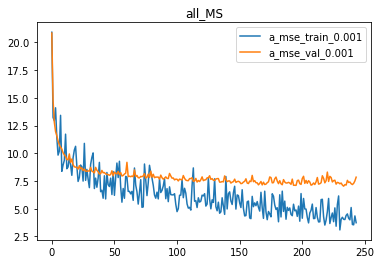

Output
 all_MS
FD factor: 0.6 - Num. outside of FD: 7

Input
['q_Car0050_MS', 'k_Car0050_MS', 'q_all_LD', 'k_all_LD', 'q_Bus_MS', 'k_Bus_MS', 'q_Taxi_MS', 'k_Taxi_MS']
Output
['q_all_MS', 'k_all_MS', 'stop_count', 'lane_changes']
Please set the FD type to 'D', 'T', or 'G'.


C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:170: RuntimeWarning: invalid value encountered in true_divide
  vTarget = t[:,qcols]/t[:,kcols]
C:\Users\ga59com\AppData\Local\Temp\ipykernel_3304\2307271336.py:176: RuntimeWarning: invalid value encountered in true_divide
  vTarget_woinf = t[:,qcols]/t[:,kcols]


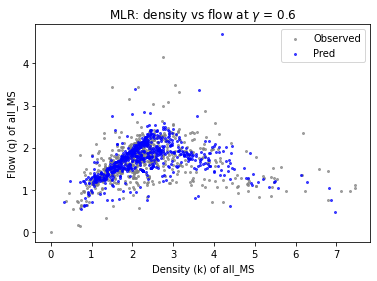

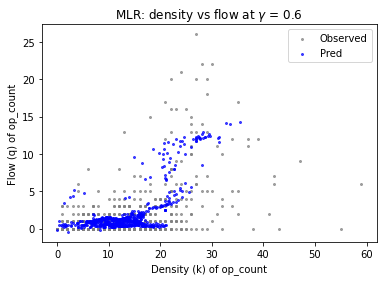

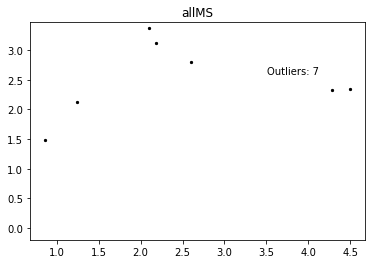

Scenario                   Method  \
0   Scen0_qk  NNFD_w_events_one_stage   
1   Scen1_qk  NNFD_w_events_one_stage   
2   Scen3_qk  NNFD_w_events_one_stage   
3  Scen10_qk  NNFD_w_events_one_stage   
4  Scen11_qk  NNFD_w_events_one_stage   

                                      Params    Pol  Run  \
0  [D_Extended, 1.9, 1.9, 1.6, -0.4, 0, 0.6]  total    0   
1  [D_Extended, 1.9, 1.9, 1.6, -0.4, 0, 0.6]  total    0   
2  [D_Extended, 1.9, 1.9, 1.6, -0.4, 0, 0.6]  total    0   
3  [D_Extended, 1.9, 1.9, 1.6, -0.4, 0, 0.6]  total    0   
4  [D_Extended, 1.9, 1.9, 1.6, -0.4, 0, 0.6]  total    0   

                                                 MAE  \
0  [271.5847473144531, 16.641740798950195, 1.3537...   
1  [231.48455810546875, 16.357641220092773, 1.135...   
2  [224.05502319335938, 15.74564266204834, 1.2939...   
3  [263.535400390625, 15.63300609588623, 1.296897...   
4  [243.54298400878906, 14.77282428741455, 0.9943...   

                                                MAPE  \
0  [0.20304482, 0.19960956, 0.61584556, 0.4648791...   
1  [0.1962505, 0.20256, 0.4818736, 0.45309994, 0....   
2  [0.12563555, 0.17562753, 0.5870812, 0.35136068...   
3  [0.18945557, 0.169471, 0.59567815, 0.49427187,...   
4  [0.21083452, 0.18858887, 0.4654053, 0.44975156...   

                                                RMSE  \
0  [451.2549743652344, 28.802112579345703, 2.3640...   
1  [366.6394958496094, 24.102588653564453, 1.8878...   
2  [329.9752502441406, 24.34778594970703, 2.35778...   
3  [428.3515930175781, 24.091705322265625, 2.1976...   
4  [395.2335510253906, 21.270483016967773, 1.8156...   

                                                  R2  \
0  [0.800804755118265, 0.7562863520975828, 0.6013...   
1  [0.8346708135206606, 0.862886597079805, 0.7400...   
2  [0.8566164483382486, 0.8264276266593017, 0.679...   
3  [0.8088609008351635, 0.8171213485965094, 0.618...   
4  [0.8342134086027972, 0.8574668320092104, 0.788...   

                                               MAE_n  \
0  [271.5848, 16.64174, 1.3537426, 4.1557946, 3.1...   
1  [231.48451, 16.357647, 1.1351806, 4.040925, 3....   
2  [224.05493, 15.745654, 1.2939473, 3.8661091, 3...   
3  [263.53534, 15.633004, 1.2968969, 4.1259475, 4...   
4  [243.54286, 14.772834, 0.99437135, 3.852941, 2...   

                                              MAPE_n  \
0  [5240199000000000.0, 0.19960956, 1634618500000...   
1  [1.6792083e+16, 739678660000000.0, 14133394000...   
2  [4811588000000000.0, 0.17562753, 1495531000000...   
3  [1.9891164e+16, 291940000000000.0, 20035173000...   
4  [0.21083452, 0.18858887, 1061592600000000.0, 5...   

                                                R2_n  Outliers  \
0  [0.733967096232411, 0.751000967122929, 0.59737...        12   
1  [0.8304957928512311, 0.8279126001943644, 0.734...         8   
2  [0.8457473865523357, 0.8208108172311321, 0.596...         6   
3  [0.752539702967536, 0.816095498878988, 0.61257...         6   
4  [0.7967024593534979, 0.8542907068304928, 0.740...        11   

                                                Cols  
0  [q_all_MS, k_all_MS, stop_count, lane_changes,...  
1  [q_all_MS, k_all_MS, stop_count, lane_changes,...  
2  [q_all_MS, k_all_MS, stop_count, lane_changes,...  
3  [q_all_MS, k_all_MS, stop_count, lane_changes,...  
4  [q_all_MS, k_all_MS, stop_count, lane_changes,...

In [27]:
##############
# NN Params - torch - q&k as multi-output to get FD diagram
##############

# save polygon information
polygoncol = pd.DataFrame(data['polygon'])
polygoncol['idcs'] = polygoncol.index
fixed_cols = ['lanes','busstops','seplane','length','road_rank']
method = 'NNFD_w_events_one_stage'

save_results = 'on' #switch to 'on'
numruns = 20
calcV = 'yes'

save_all = []
numoutside = [] #data points outside the FD
runs = []
for run in range(numruns):
    for ii,ff in enumerate([0.6]): #Gamma value
        ff = round(ff,2)
        saveall = []
        allpreds = []
        alltrues = []

        for sensor_scenario in ['Scen%s_qk'%i for i in [0,1,3,10,11]]:#scenarios can be found at the bottom of functionsfile

            print('##################################################################')
            print(run,sensor_scenario,ff)
            print('##################################################################')
        
            input_sensor_cols,output_sensor_cols = sensor_scenarios[sensor_scenario]
            output_sensor_cols = ['q_all_MS','k_all_MS','stop_count','lane_changes']
            data_norm = data

            ##############
            # 0. split data set
            ##############
            x = np.array(data_norm[fixed_cols+input_sensor_cols])
            y = np.array(data_norm[output_sensor_cols])
            s_train,s_test,s_val,randstate = [0.7,0.15,0.15,randrange(10)]
            x_train, x_test_, y_train, y_test_ = train_test_split(x, y, test_size=s_test, random_state=randstate)
            x_train_, x_val_, y_train_, y_val_ = train_test_split(x_train, y_train, test_size=s_val/(1-s_test), random_state=randstate) # 0.2143 = 0.15 / 0.7
            i_train, i_test, p_train, p_test = train_test_split(polygoncol['idcs'],polygoncol['polygon'],test_size=s_test,random_state=randstate)
            i_train, i_val, p_train, p_val = train_test_split(i_train, p_train,test_size=s_val/(1-s_test),random_state=randstate)

            targetk = output_sensor_cols[1]
            tk = output_sensor_cols.index(targetk)
            targetq = output_sensor_cols[0]
            tq = output_sensor_cols.index(targetq)
            target = targetk[2:]

            ##############
            # 1. Set-up
            ##############
            hparams = {
                "batch_size": 256,
                "learning_rate": 0.001,
                "input_size": len(fixed_cols+input_sensor_cols),
                "output_size": 4,
                "hidden_layers": 7,
                "neurons": 64,
                "inclKaiming": 1,
                "activation_function": torch.nn.LeakyReLU(),
                "gt0_loss_contraint": 0.01, # 0.01, if include loss for values <0 (q, k)
                "underFD_loss_contraint": ff,
                "max_epochs": 500,
                "FDparams":['D_Extended',1.9,1.9,1.6,-0.4,0], #FDType,mid,mid2,slopeL,slopeR,qdist // D_Extended
            }
            losses = []
            #loss function for evaluating model output (validation)
            def loss_function(y_predicted, y_target):
                return ((y_predicted - y_target)**2).mean()

            ##############
            # 2. create DataLoader objects
            ##############
            #adjust here
            train_dl = myDataLoader(x_train_,y_train_)
            val_dl = myDataLoader(x_val_,y_val_)
            test_dl = myDataLoader(x_test_,y_test_)   
            train_dl_batches = torch.utils.data.DataLoader(train_dl, batch_size=hparams['batch_size'], shuffle=True)
            
            ##############
            # 3. train model
            ##############
            device = torch.device("cpu")                       
            model = Net(hparams).to(device)
            optimizer = model.configure_optimizer()
            valbreak = 0
            for epoch in range(0, hparams['max_epochs']):
                epoch_loss = 0  # for one full epoch
                if valbreak == 0:
                    
                    for (batch_idx, batch) in enumerate(train_dl_batches):
                        (x_train, y_train) = batch              # (predictors, targets)
                        optimizer.zero_grad()                   # prepare gradients
                        out = model(x_train)                    # predicted
                        # additional loss if above FD curve
                        loss = loss_function_NNFD(y_train,out,hparams['underFD_loss_contraint'],hparams['FDparams']) #ax=0  
                        # additional loss if <0
                        if len(out[out<0])>0:
                            loss_constraint = abs(out[out<0]-y_train[out<0]).sum()
                            loss += loss_constraint*hparams['gt0_loss_contraint']
                        epoch_loss += loss.item()
                        loss.backward(retain_graph=True)        # compute gradients
                        optimizer.step()                        # update
                    
                    (x_val, y_val) = val_dl.getall()
                    with torch.no_grad():
                        loss_val = loss_function(model(x_val), y_val)
                    losses.append([epoch,loss.item(),loss_val.item()])
                    if len(losses)>100:
                        if np.mean(np.array(losses)[-50:,2])>np.mean(np.array(losses)[-100:-50,2]):
                            valbreak = 1
                                                             
            ##############
            # 4. evaluate model accuracy
            ##############
            plot_losses(losses[:],hparams['learning_rate'],target)

            print('Output\n',target)
            # (predictors, targets)
            (x_test, y_test) = test_dl.getall() 
            with torch.no_grad():
                preds = model(x_test)
            # reformat 
            preds_q = preds.detach().numpy()[:,0]
            preds_k = preds.detach().numpy()[:,1]
            preds_stop = preds.detach().numpy()[:,2]
            preds_lanec = preds.detach().numpy()[:,3]
            y_test_q = y_test.detach().numpy()[:,0]
            y_test_k = y_test.detach().numpy()[:,1]
            y_test_stop = y_test.detach().numpy()[:,2]
            y_test_lanec = y_test.detach().numpy()[:,3]
            # save for tmp analysis
            allpreds.append(preds_q); allpreds.append(preds_k); allpreds.append(preds_stop); allpreds.append(preds_lanec)
            alltrues.append(torch.tensor(y_test_q)), alltrues.append(torch.tensor(y_test_k)), 
            alltrues.append(torch.tensor(y_test_stop)), alltrues.append(torch.tensor(y_test_lanec))

            # saving the outliers by FDType
            ax=0
            FDType,mid,mid2,slopeL,slopeR,qdist = hparams['FDparams']
            ALIdcsO,AMIdcsO,ARIdcsO,PLIdcsO,PMIdcsO,PRIdcsO = [[],[],[],[],[],[]]
            if FDType=='D_Extended':
                ALIdcsO = list(np.where((y_test_k<mid) & (qdist+slopeL*y_test_k <= y_test_q))[ax])
                PLIdcsO = list(np.where((preds_k <mid) & (qdist+slopeL*preds_k  <= preds_q ))[ax])
                ARIdcsO = list(np.where((y_test_k>=mid) & ((qdist+slopeL*mid+(y_test_k-mid)*slopeR) <= y_test_q))[ax])
                PRIdcsO = list(np.where((preds_k >=mid) & ((qdist+slopeL*mid+(preds_k -mid)*slopeR) <= preds_q ))[ax])
            else:
                print("Please set the FD type to 'D_Extended'.")
            AIdcsO = ALIdcsO+AMIdcsO+ARIdcsO 
            PIdcsO = PLIdcsO+PMIdcsO+PRIdcsO 
            idcs = test_dl.getIdcs()
            idcs = np.array(i_test)[idcs]         
            origO_t = data.loc[ idcs[AIdcsO] ,:]
            origO_p = data.loc[ idcs[PIdcsO] ,:]
            print('FD factor:',hparams['underFD_loss_contraint'],'- Num. outside of FD:',len(PIdcsO))
            
            # overall error
            cols = [a for a in output_sensor_cols]
            p,t = [preds.detach().numpy(),y_test.detach().numpy()]
            p = scaleup_with_events(p,p_test,scalefactors,cols,scale_stop_lc)
            t = scaleup_with_events(t,p_test,scalefactors,cols,scale_stop_lc)
            avg_mae,avg_mape,avg_rmse,r2 = calc_error_values(p,t)
            avg_mae_n,avg_mape_n,avg_rmse_n,r2_n = calc_error_values_default(p,t, verbose='off')
            if calcV=='yes':
                vCols = ['v_%s'%a for a in set([c[2:] for c in output_sensor_cols[:2]])]
                vOrig = np.array(data.iloc[i_test][vCols].values)
                qcols,kcols = [range(0,len(output_sensor_cols),2),range(1,len(output_sensor_cols),2)]
                vTarget = t[:,qcols]/t[:,kcols]
                vPred   = p[:,qcols]/p[:,kcols]
                vpo_mae,vpo_mape,vpo_rmse,vpo_r2 = calc_error_values(vPred,vOrig,verbose='off')
                vpt_mae,vpt_mape,vpt_rmse,vpt_r2 = calc_error_values(vPred,vTarget,verbose='off')
                mask_vt = (vTarget>3000)
                mask_vp = (vPred>3000)
                vTarget_woinf = t[:,qcols]/t[:,kcols]
                vTarget_woinf[vTarget_woinf>5000] = 5000
                vPred_woinf   = p[:,qcols]/p[:,kcols]
                vPred_woinf[vPred_woinf>5000] = 5000
                vpo_mae_n,vpo_mape_n,vpo_rmse_n,vpo_r2_n = calc_error_values_default(vPred_woinf,vOrig,verbose='off')
                vpt_mae_n,vpt_mape_n,vpt_rmse_n,vpt_r2_n = calc_error_values_default(vPred_woinf,vTarget_woinf,verbose='off')
                avg_mae += vpo_mae + vpt_mae
                avg_mape+= vpo_mape + vpt_mape
                avg_rmse+= vpo_rmse + vpt_rmse
                r2      += vpo_r2 + vpt_r2
                avg_mae_n += vpo_mae_n + vpt_mae_n
                avg_mape_n+= vpo_mape_n + vpt_mape_n
                avg_rmse_n+= vpo_rmse_n + vpt_rmse_n
                r2_n      += vpo_r2_n + vpt_r2_n
                cols    += ['%s_Orig'%i for i in vCols] + ['%s_Target'%i for i in vCols] 
            print('\nInput\n%s\nOutput\n%s'%(input_sensor_cols,output_sensor_cols))
            save_all.append([sensor_scenario,method,\
                             hparams['FDparams']+[hparams['underFD_loss_contraint']],\
                             'total',run,avg_mae,avg_mape,avg_rmse,r2,avg_mae_n,avg_mape_n,r2_n,len(PIdcsO),cols])
            numoutside.append([ff,sensor_scenario,len(PIdcsO),avg_rmse[1],avg_mae[1],avg_rmse[0],avg_mae[0]])
            runs.append([run,sensor_scenario,ff,len(PIdcsO)])

        # plot preds with FD curve
        plot_preds(alltrues,allpreds,avg_mae,avg_rmse,output_sensor_cols,hparams['FDparams'],ff,1,save='off')
        plt.scatter(preds_k[PIdcsO],preds_q[PIdcsO],color='black',s=5)
        plt.ylim(bottom=-0.2)
        plt.text(.75*plt.gca().get_xlim()[1], .75*plt.gca().get_ylim()[1], 'Outliers: %s'%(len(PIdcsO)),size=10)
        plt.title('allMS')
        #plt.savefig('%s_%s.pdf'%(run,ff), format='pdf', dpi=1200, bbox_inches='tight')
        plt.show()
        
results = pd.DataFrame(save_all,columns=['Scenario','Method','Params','Pol','Run','MAE','MAPE','RMSE','R2','MAE_n','MAPE_n','R2_n','Outliers','Cols'])
display(results[results.Pol=='total'].head())
if save_results == 'on':
    results.to_pickle('../output/result_runs_w_events/%s_%s_runs.pkl'%(method,numruns))
    #results.to_csv('../output/results_runs/%s.csv'%(method),index=False)